In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [2]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [3]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [4]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [6]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [7]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [8]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [9]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [10]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [11]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [12]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [13]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [14]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [15]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [16]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [17]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [18]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [19]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [20]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [21]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [22]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [23]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [24]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [25]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [26]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file<h1>

In [27]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
import numpy as np
import scipy.stats as stats
import collections
import math

In [28]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric, random_state = 0)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full', random_state = 0)
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [29]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric, random_state = 0)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full', random_state = 0)
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [30]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [31]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [32]:
def cluster_insight_studio_live(df_to_copy, labels):

    df = df_to_copy.copy()
    df['Labels'] = labels
    
    print("Dataset con le labels associate")
    ipd.display(df)
    
    cluster_dict = pd.DataFrame(columns = ["Studio_Recording", "Live_Recording"], \
                                index = ["Cluster {}".format(str(i)) for i in np.unique(df['Labels'])])
    
    tot_entropies = []
    dim_clusters = []
    max_cluster = 0
    
    for i in np.unique(df['Labels']):
        
        cluster_list = list(df[df['Labels'] == i].index)
                            
        print("Cluster {}\n".format(i), cluster_list)
        
        raw_elements = [elem.split("_")[1] for elem in cluster_list]
        counter = collections.Counter(raw_elements)
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Studio_Recording'] = counter['studio']
        cluster_dict.loc["Cluster {}".format(str(i)), 'Live_Recording'] = counter['live']
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = cluster_dict.loc["Cluster {}".format(str(i)), ['Studio_Recording', 'Live_Recording']].sum()
        
        lista = cluster_dict.loc['Cluster {}'.format(str(i)), ['Studio_Recording', 'Live_Recording']].values.tolist()
        tot = sum(lista)
        dim_clusters.append(tot)
        
        '''
        Entropia singola: -(sommatoria di (pij log2 pij) per tutte le classi all'interno di un cluster.
        --> pij = mij/mj dove mj è il numero di valori nel cluster j e mij è il numero di valori della classe i
        nel cluster j.
        '''
        entropy_single = -sum([(x/tot)*math.log2(x/tot) for x in lista if x != 0])
        cluster_dict.loc["Cluster {}".format(str(i)), 'Entropy'] = "%.4f" %(entropy_single)
        tot_entropies.append(entropy_single)
        
        
        '''
        Purity singola: etichetta della classe più frequente/numero di valori nel cluster
        '''
        purity_single = max(lista)/tot
        cluster_dict.loc["Cluster {}".format(str(i)), 'Purity'] = "%.4f" %(purity_single)

        max_cluster += max(lista)
        
        print()
        
    
    new_row = pd.Series(cluster_dict[['Studio_Recording', 'Live_Recording', 'Tot_Cluster']].sum(axis=0).astype(int), name = "Total")
    cluster_dict = cluster_dict.append(new_row, ignore_index=False)
    
    '''
    Entropia complessiva: sommatoria delle entropie di ogni cluster pesate per la dimensione di ogni cluster.
    --> (mj/m) * ej --> dove mj è la dimensione del cluster j e m è il numero totale di punti 
    (nel nostro caso 16). 
    '''
    
    last_tot = 16
    tot_entropy = 0

    for entropy, dim in zip(tot_entropies, dim_clusters):
        tot_entropy+=(entropy*(dim/last_tot))
        
    cluster_dict.loc["Total", 'Entropy'] = "%.4f" %(tot_entropy)
    
    '''
    Purity complessiva: sommatoria delle classi "corrette" (il valore più alto) di ogni cluster, divisa per il
    numero totale di valori (nel nostro caso 16).
    '''
    
    tot_purity = max_cluster/last_tot
    cluster_dict.loc["Total", 'Purity'] = "%.4f" %(tot_purity)
    
    
    
    cluster_dict['Tot_Cluster'] = cluster_dict['Tot_Cluster'].astype(int)
    
    
    ipd.display(cluster_dict)

In [33]:
def analyze_clusters(labels, X, df_to_copy, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [34]:
def analyze_approximated_clusters(labels, X, df, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = pd.DataFrame(np.squeeze(X), index = df.index)
    
    if together:
        
        cluster_insight_studio_live(df, labels)

        df['Labels'] = labels
    
    else:
        df['Labels'] = labels
        
        ipd.display(df)
        print()

        for i in np.unique(df['Labels']):
            print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
            print()
            
    
    print()
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.9)
    else:
        plt.subplots_adjust(hspace=1.1)
    plt.show()

In [35]:
def analyze_clusters_fb(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, color in zip(X[labels == i], colors):
            plt.plot(x, color = color, linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [36]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        #'med': np.median(values),
        #'10p': np.percentile(values, 10),
        #'25p': np.percentile(values, 25),
        #'50p': np.percentile(values, 50),
        #'75p': np.percentile(values, 75),
        #'90p': np.percentile(values, 90),
        #'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [37]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [38]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [39]:
def plot_centroids_approximated(centers, X, album_type, approximation_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " - " + approximation_type + " centroids\nApproximated Clustering")
    plt.show()

In [40]:
def plot_mean_values_approximated(labels, X, album_type, approximation_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \n{} - Approximated Clustering".format(album_type, \
                                                            approximation_type))
    
    plt.show()

<h2>Datasets Months</h2>

In [41]:
df_studio = pd.read_csv('df_month_studio.csv', index_col = 0)
df_live = pd.read_csv('df_month_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_month_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [42]:
album_type = "Studio_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [43]:
df_studio

January  February  March  April   May  June  July  August  \
track_date_created                                                              
2009_studio             131       145    486   1501  1477   904  1005     353   
2010_studio             949       811    835    754  1180   761   786    1031   
2011_studio            1030       979    855    622   584   664  1145     988   
2012_studio            1103      1194    894    637  1172   992   652     595   
2013_studio            1397       753    954   1946  1122   958   651     695   
2014_studio             789       982    610    658  1150   614   604     815   
2015_studio             737      1051    998    975  1732   948   825     773   
2016_studio            1307      1376   1017    906  1494  1033   917     809   

                    September  October  November  December  
track_date_created                                          
2009_studio               321      555       731       657  
2010_studio               968     1001      1151      1263  
2011_studio               585      741       527       802  
2012_studio               650     1144       806       906  
2013_studio               842      939      1016      1303  
2014_studio               332      803       789      1025  
2015_studio               946      937      1069       932  
2016_studio              1493      941       987      1282

In [44]:
df_studio.shape

(8, 12)

In [45]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[ 131.],
        [ 145.],
        [ 486.],
        [1501.],
        [1477.],
        [ 904.],
        [1005.],
        [ 353.],
        [ 321.],
        [ 555.],
        [ 731.],
        [ 657.]],

       [[ 949.],
        [ 811.],
        [ 835.],
        [ 754.],
        [1180.],
        [ 761.],
        [ 786.],
        [1031.],
        [ 968.],
        [1001.],
        [1151.],
        [1263.]],

       [[1030.],
        [ 979.],
        [ 855.],
        [ 622.],
        [ 584.],
        [ 664.],
        [1145.],
        [ 988.],
        [ 585.],
        [ 741.],
        [ 527.],
        [ 802.]],

       [[1103.],
        [1194.],
        [ 894.],
        [ 637.],
        [1172.],
        [ 992.],
        [ 652.],
        [ 595.],
        [ 650.],
        [1144.],
        [ 806.],
        [ 906.]],

       [[1397.],
        [ 753.],
        [ 954.],
        [1946.],
        [1122.],
        [ 958.],
        [ 651.],
        [ 695.],
        [ 842.],
        [ 939.],
      

In [46]:
tss_studio.shape

(8, 12, 1)

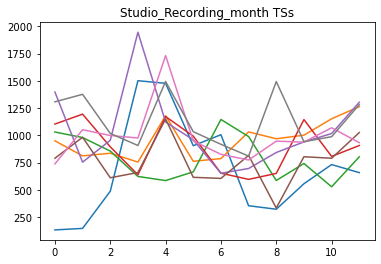

In [47]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [48]:
tss_studio_scaled = TimeSeriesScalerMinMax().fit_transform(tss_studio)
tss_studio_scaled

array([[[0.        ],
        [0.01021898],
        [0.25912409],
        [1.        ],
        [0.98248175],
        [0.56423358],
        [0.6379562 ],
        [0.1620438 ],
        [0.13868613],
        [0.30948905],
        [0.4379562 ],
        [0.38394161]],

       [[0.38310413],
        [0.11198428],
        [0.15913556],
        [0.        ],
        [0.83693517],
        [0.01375246],
        [0.06286837],
        [0.54420432],
        [0.42043222],
        [0.48526523],
        [0.77996071],
        [1.        ]],

       [[0.81391586],
        [0.73139159],
        [0.53074434],
        [0.15372168],
        [0.09223301],
        [0.22168285],
        [1.        ],
        [0.74595469],
        [0.09385113],
        [0.34627832],
        [0.        ],
        [0.44498382]],

       [[0.84808013],
        [1.        ],
        [0.49916528],
        [0.07011686],
        [0.96327212],
        [0.66277129],
        [0.0951586 ],
        [0.        ],
        [0.0918197 ],
    

In [49]:
tss_studio_scaled.shape

(8, 12, 1)

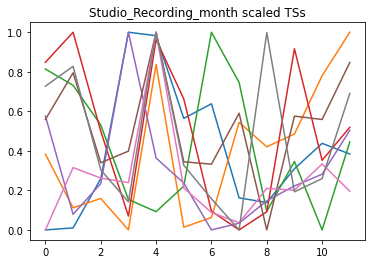

In [50]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [51]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   

                    November  December  
track_date_created                      
2009_studio         0.437956  0.383942  
2010_studio         0.779961  1.000000  
2011_studio         0.000000  0.444984  
2012_studio         0.352254  0.519199  
2013_studio         0.281853  0.503475  
2014_studio         0.558680  0.847188  
2015_studio         0.333668  0.195980  
2016_studio         0.259854  0.690511

<h3>Euclidean Distance</h3>

k:  2 SSE:  0.6968750823409262 Silhouette Score:  0.15075920133977122

k:  3 SSE:  0.4766318909324214 Silhouette Score:  0.16263918435935154

k:  4 SSE:  0.33649455599023215 Silhouette Score:  0.12200838601315019

k:  5 SSE:  0.2299428571424633 Silhouette Score:  0.10422375194157024

k:  6 SSE:  0.1386657611904094 Silhouette Score:  0.04972311490615797

k:  7 SSE:  0.06508550084635456 Silhouette Score:  0.03021581365391951



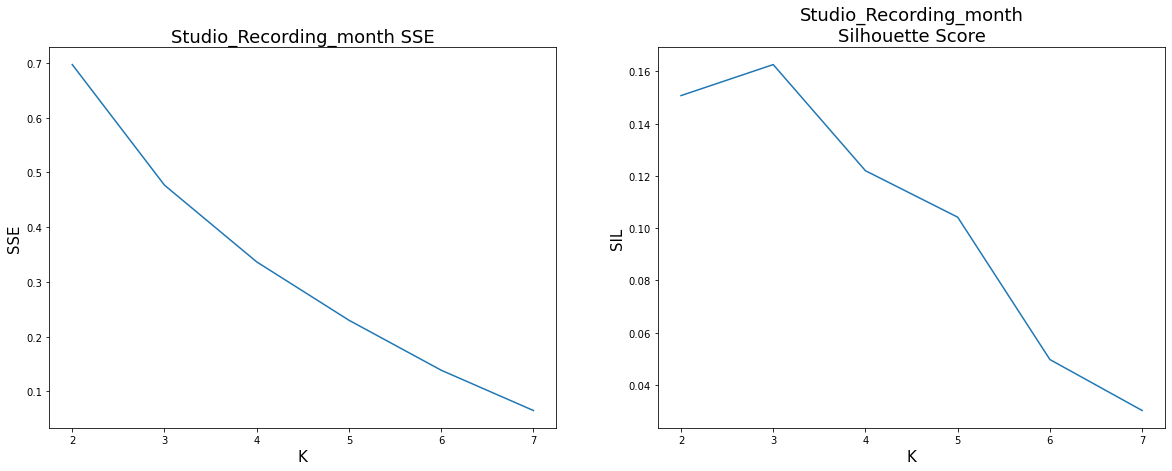

In [52]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 3**

In [53]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(3, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  0.4766318909324214
Silhouette Score:  0.16263918435935154


In [54]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   

                    November  December  Labels  
track_date_created                              
2009_studio         0.437956  0.383942       1  
2010_studio         0.779961  1.000000       0  
2011_studio         0.000000  0.444984       2  
2012_studio         0.352254  0.519199       0  
2013_studio         0.281853  0.503475       1  
2014_studio         0.558680  0.847188       0  
2015_studio         0.333668  0.195980       1  
2016_studio         0.259854  0.690511       0

Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2011_studio']



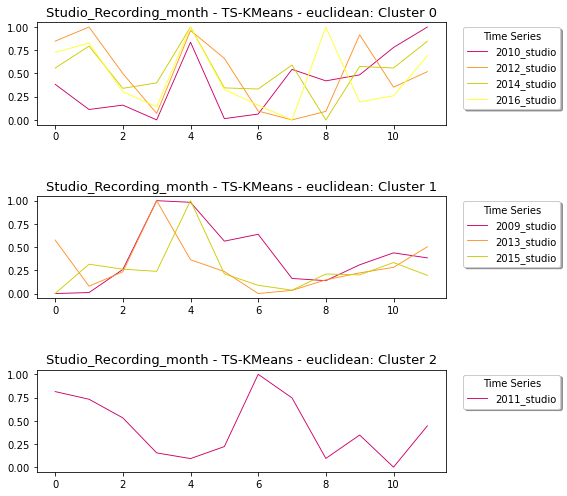

In [55]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

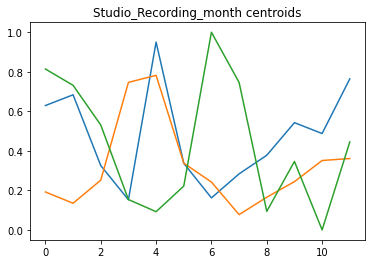

In [56]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  0.23900228740171425 Silhouette Score:  0.2525651611753118

k:  3 SSE:  0.15602251450715976 Silhouette Score:  0.19258741694551917

k:  4 SSE:  0.10365984034143619 Silhouette Score:  0.20121490037529566

k:  5 SSE:  0.05817714661807906 Silhouette Score:  0.1986155547372867

k:  6 SSE:  0.03538040335476299 Silhouette Score:  0.08966790691979701

k:  7 SSE:  0.017239870759260603 Silhouette Score:  0.05861380348438658



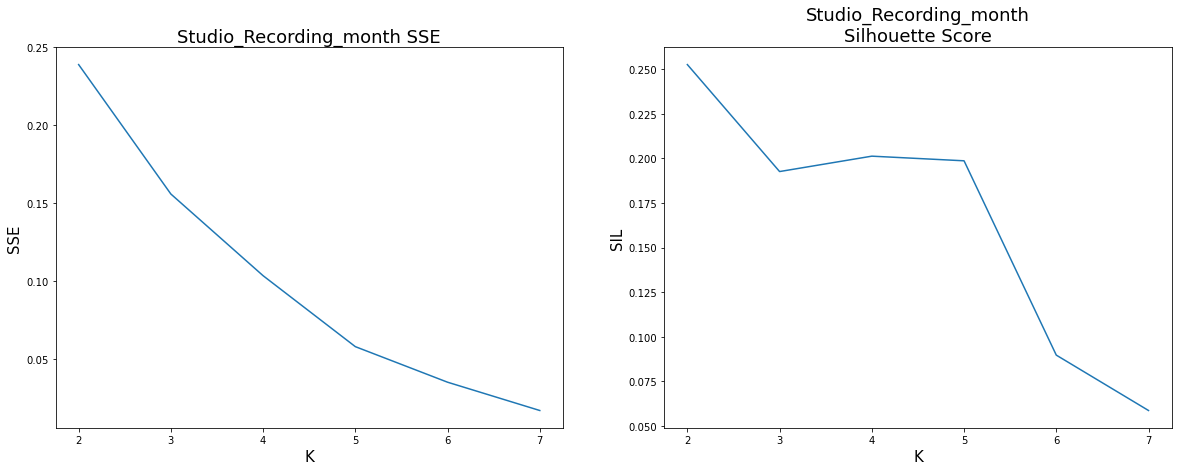

In [57]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 4**

In [58]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(4, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (4, 12, 1)

Labels:  {0: 2, 1: 3, 2: 2, 3: 1}

SSE:  0.10365984034143619
Silhouette Score:  0.20121490037529566


In [59]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   

                    November  December  Labels  
track_date_created                              
2009_studio         0.437956  0.383942       2  
2010_studio         0.779961  1.000000       3  
2011_studio         0.000000  0.444984       1  
2012_studio         0.352254  0.519199       0  
2013_studio         0.281853  0.503475       1  
2014_studio         0.558680  0.847188       1  
2015_studio         0.333668  0.195980       2  
2016_studio         0.259854  0.690511       0

Cluster 0
 ['2012_studio', '2016_studio']

Cluster 1
 ['2011_studio', '2013_studio', '2014_studio']

Cluster 2
 ['2009_studio', '2015_studio']

Cluster 3
 ['2010_studio']



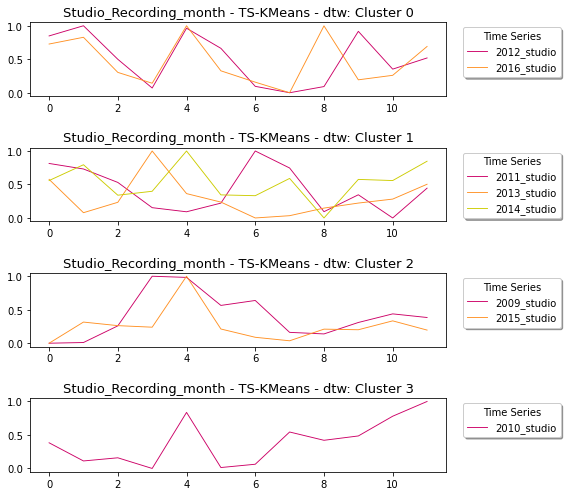

In [60]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

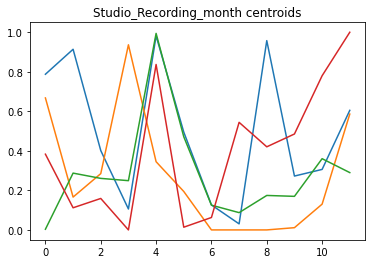

In [61]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  5.57500065872741 Silhouette Score:  0.15075920133977125
Calinski-Harabaz:  2.4364069644723783 Davies-Bouldin:  1.4234874021906028

k:  3 SSE:  3.813055127459371 Silhouette Score:  0.1626391843593515
Calinski-Harabaz:  2.63946743622132 Davies-Bouldin:  1.0395490008449235

k:  4 SSE:  2.691956447921857 Silhouette Score:  0.12200838601315026
Calinski-Harabaz:  2.5492599729038994 Davies-Bouldin:  0.9167120514345679

k:  5 SSE:  1.8395428571397066 Silhouette Score:  0.10422375194157024
Calinski-Harabaz:  2.4459689197835064 Davies-Bouldin:  0.641927437086603

k:  6 SSE:  1.1093260895232753 Silhouette Score:  0.049723114906157946
Calinski-Harabaz:  2.4265193212597564 Davies-Bouldin:  0.5530755051201418

k:  7 SSE:  0.5206840067708365 Silhouette Score:  0.030215813653919517
Calinski-Harabaz:  2.342478023171962 Davies-Bouldin:  0.3838400501316913



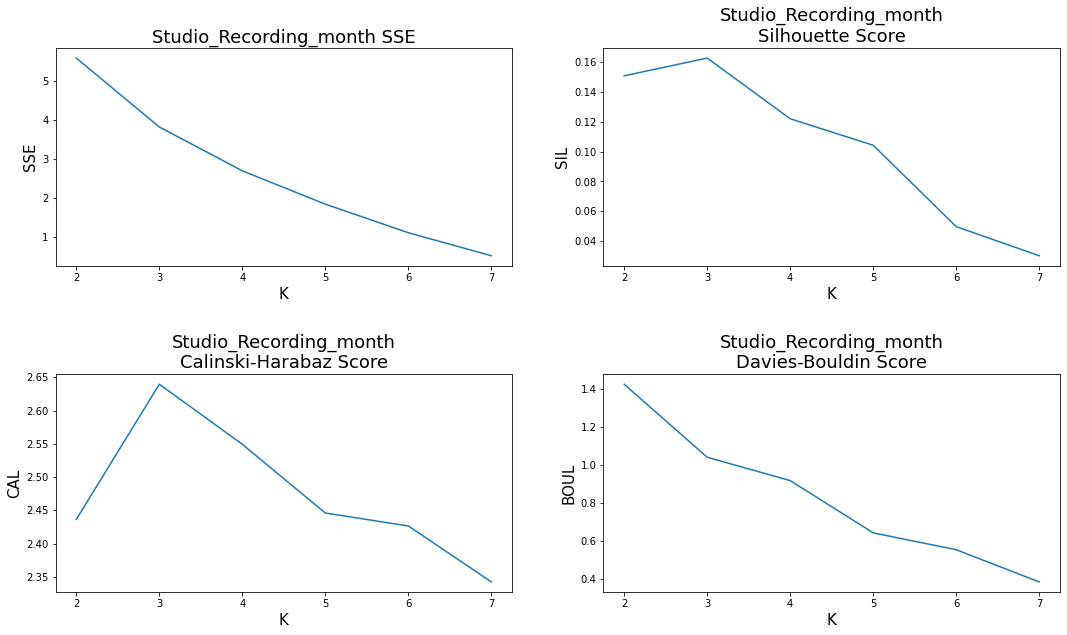

In [62]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [63]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(3, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (3, 12)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  3.813055127459371
Silhouette Score:  0.1626391843593515
Calinski - Harabaz Score:  2.63946743622132
Davies - Bouldin Score:  1.0395490008449235


In [64]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   

                    November  December  Labels  
track_date_created                              
2009_studio         0.437956  0.383942       1  
2010_studio         0.779961  1.000000       0  
2011_studio         0.000000  0.444984       2  
2012_studio         0.352254  0.519199       0  
2013_studio         0.281853  0.503475       1  
2014_studio         0.558680  0.847188       0  
2015_studio         0.333668  0.195980       1  
2016_studio         0.259854  0.690511       0

Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2011_studio']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [65]:
F = [list(calculate_features(x).values())for x in tss_studio_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  6.561579444045222 Silhouette Score:  0.6500502227049733
Calinski-Harabaz:  22.59950725968627 Davies-Bouldin:  0.14689494037440665

k:  3 SSE:  1.4418529325060283 Silhouette Score:  0.533900732235246
Calinski-Harabaz:  51.7293920072979 Davies-Bouldin:  0.14424991833196232

k:  4 SSE:  0.5157093700160629 Silhouette Score:  0.34181714502976107
Calinski-Harabaz:  79.52958410541046 Davies-Bouldin:  0.43054340665684065

k:  5 SSE:  0.18960671609478386 Silhouette Score:  0.26460460043994694
Calinski-Harabaz:  122.96525044712149 Davies-Bouldin:  0.16464997124688077

k:  6 SSE:  0.04555754495501432 Silhouette Score:  0.19090599452936188
Calinski-Harabaz:  274.2093819443546 Davies-Bouldin:  0.14734639673155406

k:  7 SSE:  0.013430183061349747 Silhouette Score:  0.05509931253990438
Calinski-Harabaz:  387.9680670474952 Davies-Bouldin:  0.1709387604100813



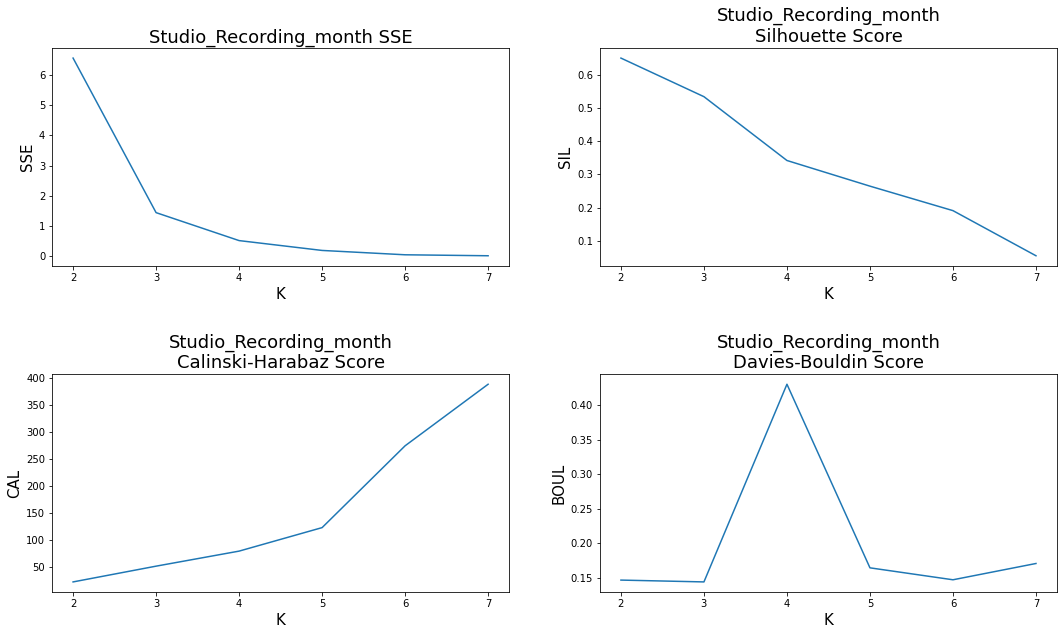

In [66]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [67]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  1.4418529325060283
Silhouette Score:  0.533900732235246
Calinski - Harabaz Score:  51.7293920072979
Davies - Bouldin Score:  0.14424991833196232


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

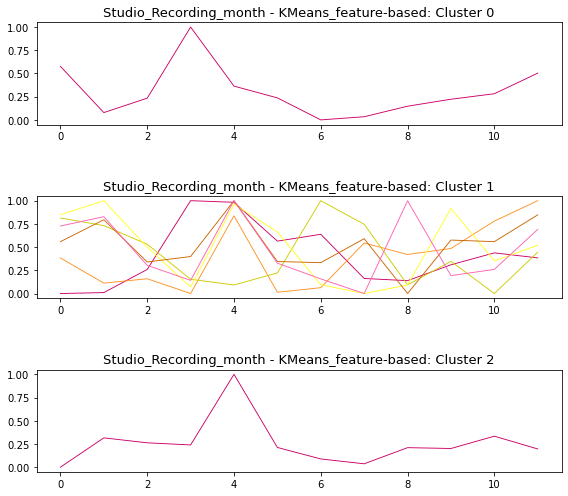

In [68]:
analyze_clusters_fb(labels_studio_fb, tss_studio_scaled, album_type, 'KMeans_feature-based', False)

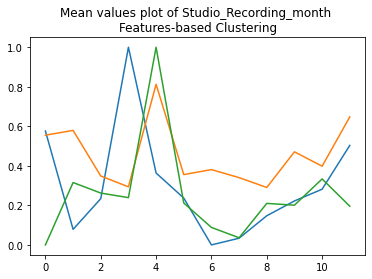

In [69]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [70]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [71]:
print(tss_studio_scaled.shape, M.shape)

(8, 12, 1) (8, 8)


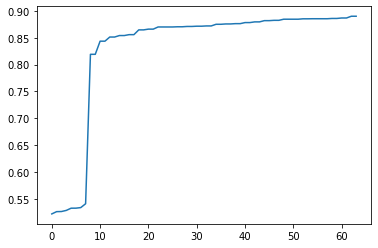

In [72]:
plt.plot(sorted(M.ravel()))
plt.show()

In [74]:
dbscan_compression_studio = DBSCAN(eps=0.83, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.83, metric='precomputed')

In [75]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [76]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)
X_paa.shape

(8, 6, 1)

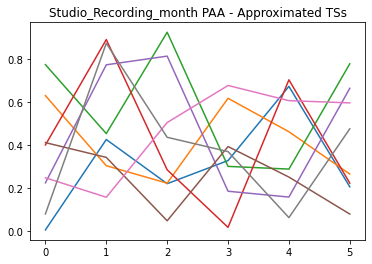

In [77]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  0.2174861411157351 Silhouette Score:  0.20593715936543094

k:  3 SSE:  0.1295340073079549 Silhouette Score:  0.24289918145790027

k:  4 SSE:  0.07475695676578734 Silhouette Score:  0.28353179008042706

k:  5 SSE:  0.04687069420259096 Silhouette Score:  0.2218333712552792

k:  6 SSE:  0.020859267446732003 Silhouette Score:  0.188598756470316

k:  7 SSE:  0.003663050138562966 Silhouette Score:  0.1476485366787833



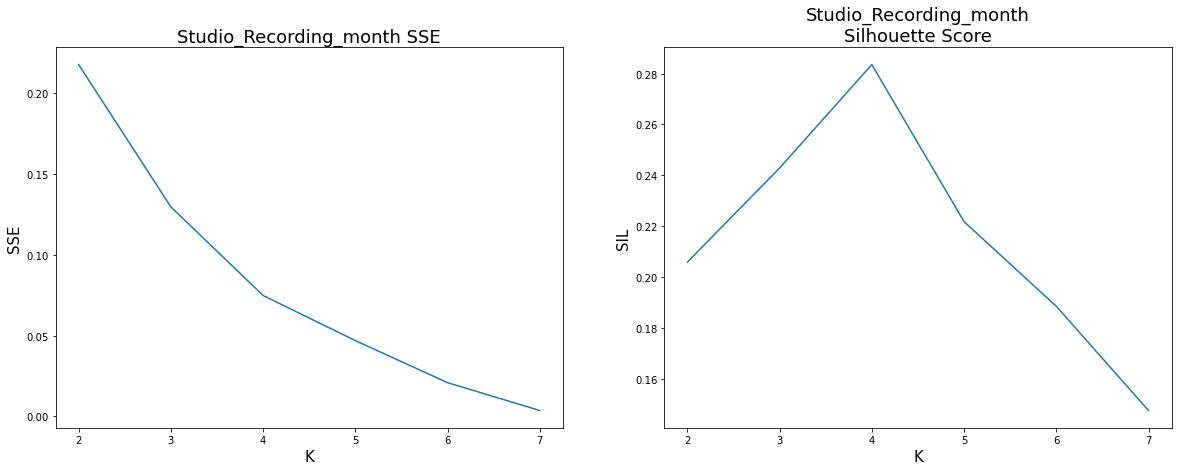

In [78]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [79]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(4, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 2, 1: 3, 2: 2, 3: 1}

SSE:  0.07475695676578734
Silhouette Score:  0.28353179008042706


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.005109  0.629562  0.773358  0.400000  0.224088   
2010_studio         0.247544  0.079568  0.425344  0.303536  0.452849   
2011_studio         0.772654  0.342233  0.156958  0.872977  0.220065   
2012_studio         0.924040  0.284641  0.813022  0.047579  0.504174   
2013_studio         0.327413  0.616988  0.300386  0.016988  0.184942   
2014_studio         0.676650  0.369193  0.672372  0.461491  0.287897   
2015_studio         0.157789  0.250754  0.606030  0.062312  0.205528   
2016_studio         0.777372  0.222628  0.663504  0.078832  0.595620   

                           5  Labels  
track_date_created                    
2009_studio         0.410949       1  
2010_studio         0.889980       2  
2011_studio         0.222492       3  
2012_studio         0.435726       0  
2013_studio         0.392664       1  
2014_studio         0.702934       2  
2015_studio         0.264824       1  
2016_studio         0.475182       0


Cluster 0
 ['2012_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2010_studio', '2014_studio']

Cluster 3
 ['2011_studio']




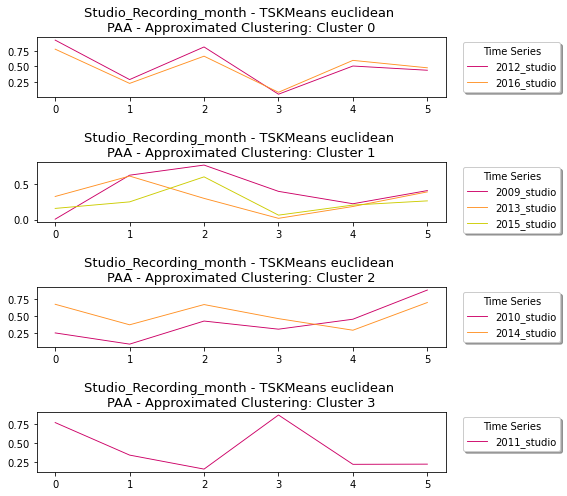

In [80]:
analyze_approximated_clusters(labels_studio_paa, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

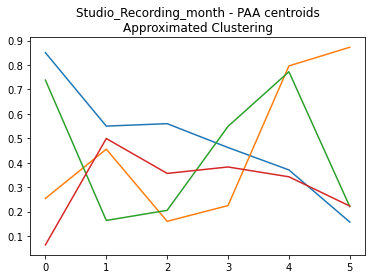

In [81]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type, 'PAA')

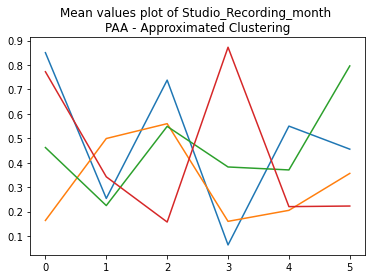

In [82]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.10932624449925692 Silhouette Score:  0.3368322023364405

k:  3 SSE:  0.06993692164116783 Silhouette Score:  0.31220756055538407

k:  4 SSE:  0.042342417729014814 Silhouette Score:  0.19405978924395173

k:  5 SSE:  0.025357580859166378 Silhouette Score:  0.25348904139657125

k:  6 SSE:  0.010193148143036785 Silhouette Score:  0.17182272814085703

k:  7 SSE:  0.003663050138562966 Silhouette Score:  0.11104589928389887



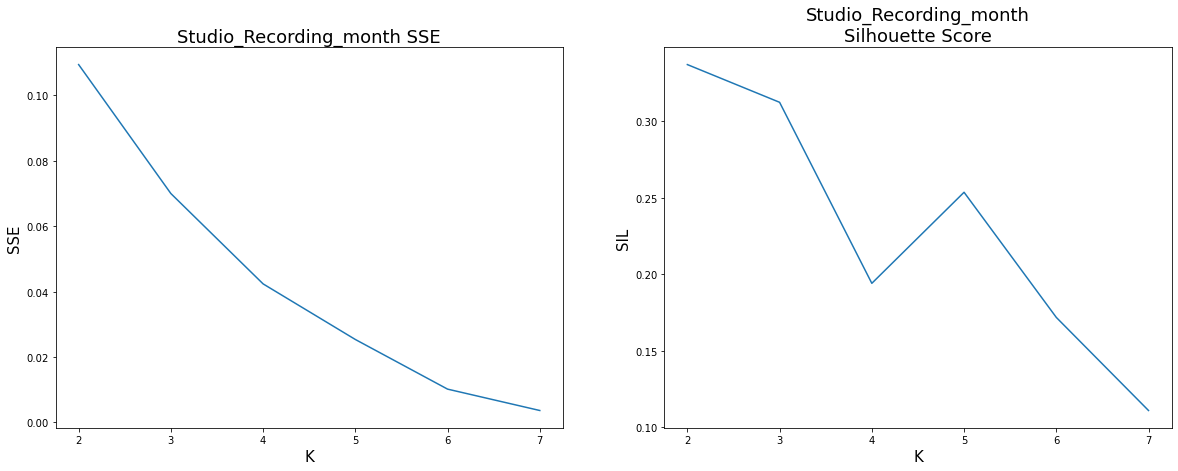

In [83]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [84]:
cluster_centers_studio_paa_dtw, dict_label_studio_paa_dtw, labels_studio_paa_dtw = run_kmeans(3, 300, 10, 'dtw', X_paa,\
                                                                      False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 2, 1: 3, 2: 3}

SSE:  0.06993692164116783
Silhouette Score:  0.31220756055538407


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.005109  0.629562  0.773358  0.400000  0.224088   
2010_studio         0.247544  0.079568  0.425344  0.303536  0.452849   
2011_studio         0.772654  0.342233  0.156958  0.872977  0.220065   
2012_studio         0.924040  0.284641  0.813022  0.047579  0.504174   
2013_studio         0.327413  0.616988  0.300386  0.016988  0.184942   
2014_studio         0.676650  0.369193  0.672372  0.461491  0.287897   
2015_studio         0.157789  0.250754  0.606030  0.062312  0.205528   
2016_studio         0.777372  0.222628  0.663504  0.078832  0.595620   

                           5  Labels  
track_date_created                    
2009_studio         0.410949       1  
2010_studio         0.889980       0  
2011_studio         0.222492       2  
2012_studio         0.435726       2  
2013_studio         0.392664       1  
2014_studio         0.702934       0  
2015_studio         0.264824       1  
2016_studio         0.475182       2


Cluster 0
 ['2010_studio', '2014_studio']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2011_studio', '2012_studio', '2016_studio']




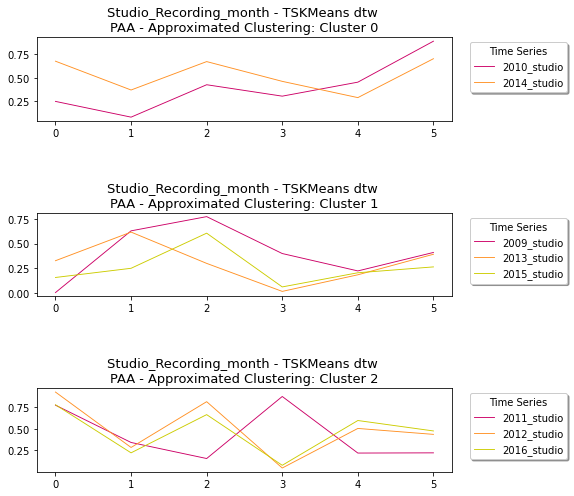

In [85]:
analyze_approximated_clusters(labels_studio_paa_dtw, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

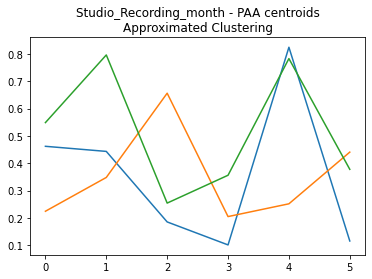

In [86]:
plot_centroids_approximated(cluster_centers_studio_paa_dtw, X_paa, album_type, 'PAA')

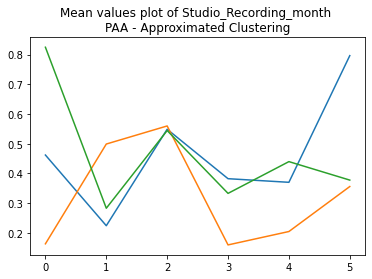

In [87]:
plot_mean_values_approximated(labels_studio_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [88]:
n_sax1d_segments = 6
n_sax_symbols_avg = 6
#n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg)

X_sax1d = one_d_sax.fit_transform(tss_studio_scaled)
X_sax1d.shape

(8, 6, 2)

In [89]:
#plt.plot(X_sax1d.reshape(X_sax1d.shape[1], X_sax1d.shape[0]))
#plt.title(album_type + "\nOneD_Sax - Approximated TSs")
#plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  11.34375 Silhouette Score:  0.12469369038608225

k:  3 SSE:  7.687500000000001 Silhouette Score:  0.18540555000051562

k:  4 SSE:  5.145833333333334 Silhouette Score:  0.18761095238668168

k:  5 SSE:  3.3125 Silhouette Score:  0.15354041128831666

k:  6 SSE:  2.0625 Silhouette Score:  0.10269983607559263

k:  7 SSE:  0.9375000000000001 Silhouette Score:  0.058009324057246896



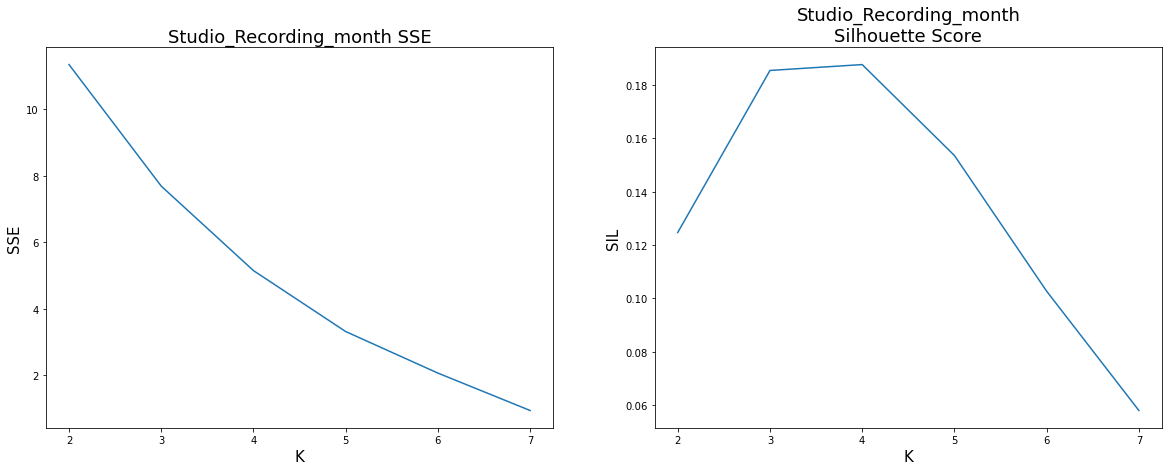

In [90]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [91]:
cluster_centers_studio_sax1d, dict_label_studio_sax1d, \
labels_studio_sax1d = run_kmeans(4, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (4, 6, 2)

Labels:  {0: 3, 1: 2, 2: 1, 3: 2}

SSE:  5.145833333333334
Silhouette Score:  0.18761095238668168


In [92]:
#analyze_approximated_clusters(labels_studio_sax1d, X_sax1d, df_tss_studio_scaled, \
#                              album_type, \
#                              '\nTSKMeans - OneD_SAX - Approximated Clustering', False)

In [93]:
#plot_centroids_approximated(cluster_centers_studio_sax1d, X_sax1d, album_type, 'OneD_Sax')

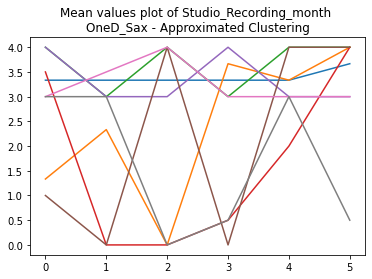

In [94]:
plot_mean_values_approximated(labels_studio_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  5.5702380952380945 Silhouette Score:  0.264550329397994

k:  3 SSE:  2.9062500000000004 Silhouette Score:  0.34640722199352886

k:  4 SSE:  1.9270833333333335 Silhouette Score:  0.3048628252231486

k:  5 SSE:  0.9479166666666667 Silhouette Score:  0.2547579985091396

k:  6 SSE:  0.6041666666666667 Silhouette Score:  0.11938204210970293

k:  7 SSE:  0.25 Silhouette Score:  0.03613452850904476



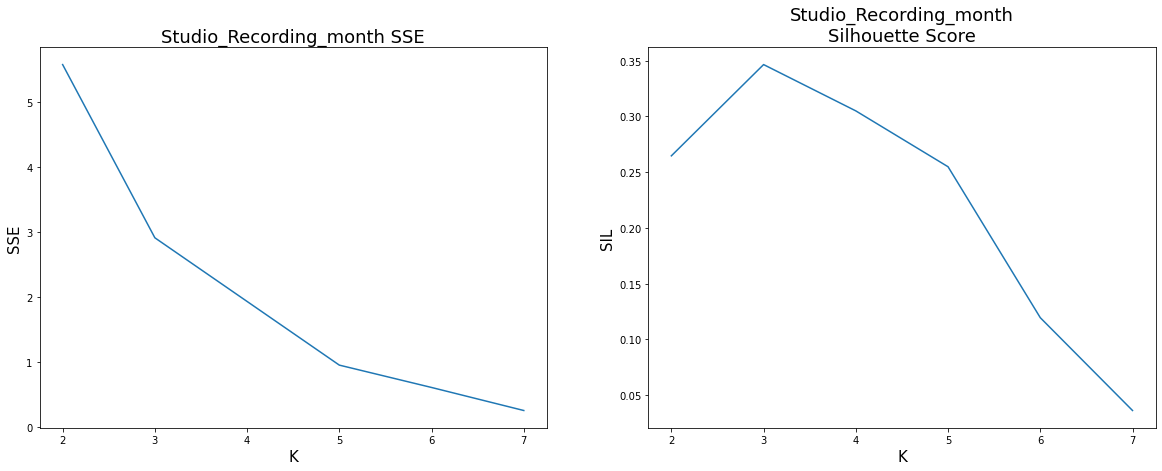

In [95]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [96]:
cluster_centers_studio_sax1d_dtw, dict_label_studio_sax1d_dtw, \
labels_studio_sax1d_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (3, 6, 2)

Labels:  {0: 3, 1: 2, 2: 3}

SSE:  2.9062500000000004
Silhouette Score:  0.34640722199352886


In [97]:
#analyze_approximated_clusters(labels_studio_sax1d_dtw, X_sax1d, df_tss_studio_scaled, album_type, \
#                               'TSKMeans dtw \nOneD_SAX - Approximated Clustering', False)

In [98]:
#plot_centroids_approximated(cluster_centers_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

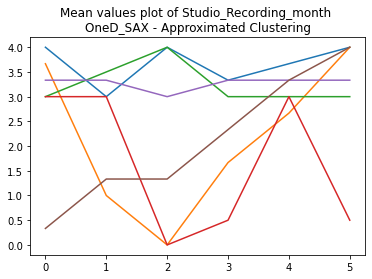

In [99]:
plot_mean_values_approximated(labels_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [100]:
n_sax_segments = 6
n_sax_symbols = 6

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_scaled)

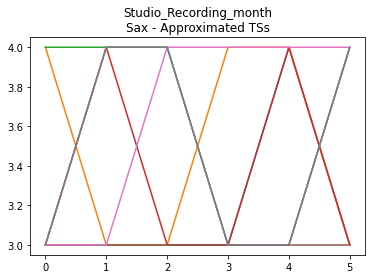

In [101]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  0.8125 Silhouette Score:  0.27707312170059445

k:  3 SSE:  0.4583333333333333 Silhouette Score:  0.36683162243519934

k:  4 SSE:  0.29166666666666663 Silhouette Score:  0.4162120018218858

k:  5 SSE:  0.16666666666666663 Silhouette Score:  0.38826914373533106

k:  6 SSE:  0.0625 Silhouette Score:  0.28661165235168157

k:  7 SSE:  0.0 Silhouette Score:  0.25



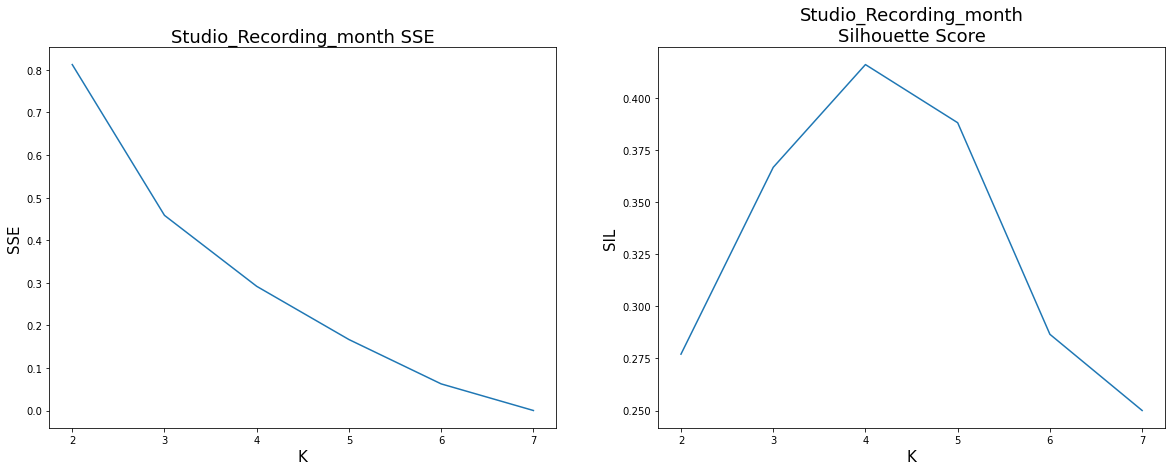

In [102]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [103]:
cluster_centers_studio_sax, dict_label_studio_sax, \
labels_studio_sax = run_kmeans(4, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 3, 1: 2, 2: 2, 3: 1}

SSE:  0.29166666666666663
Silhouette Score:  0.4162120018218858


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         3  4  4  3  3  3       0
2010_studio         3  3  3  3  4  4       3
2011_studio         4  3  3  4  3  3       2
2012_studio         4  3  4  3  4  4       1
2013_studio         3  4  3  3  3  3       0
2014_studio         4  3  4  4  3  4       2
2015_studio         3  3  4  3  3  3       0
2016_studio         4  3  4  3  4  4       1


Cluster 0
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 1
 ['2012_studio', '2016_studio']

Cluster 2
 ['2011_studio', '2014_studio']

Cluster 3
 ['2010_studio']




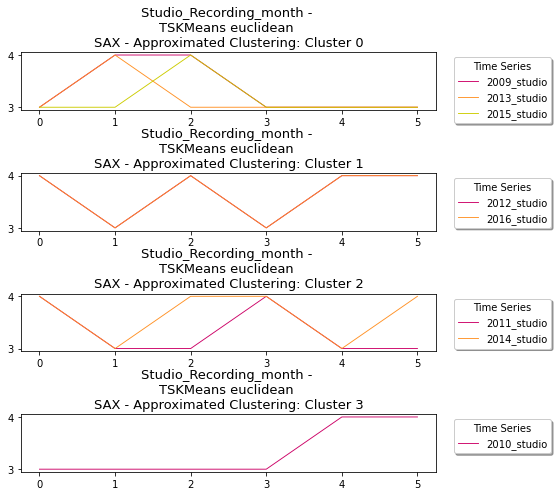

In [104]:
analyze_approximated_clusters(labels_studio_sax, X_sax, df_tss_studio_scaled, \
                              album_type, \
                              '\nTSKMeans euclidean \nSAX - Approximated Clustering', False)

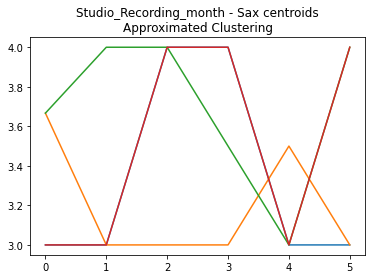

In [105]:
plot_centroids_approximated(cluster_centers_studio_sax, X_sax, album_type, 'Sax')

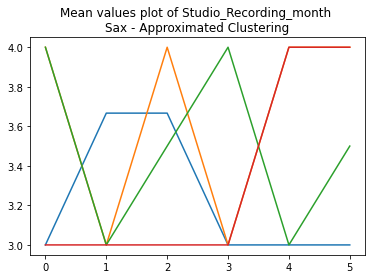

In [106]:
plot_mean_values_approximated(labels_studio_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  0.28750000000000003 Silhouette Score:  0.6161072084797072

k:  3 SSE:  0.09375 Silhouette Score:  0.7001777449099222

k:  4 SSE:  0.0 Silhouette Score:  0.75

k:  5 SSE:  inf Silhouette Score:  0.75

k:  6 SSE:  inf Silhouette Score:  0.75

k:  7 SSE:  inf Silhouette Score:  0.75



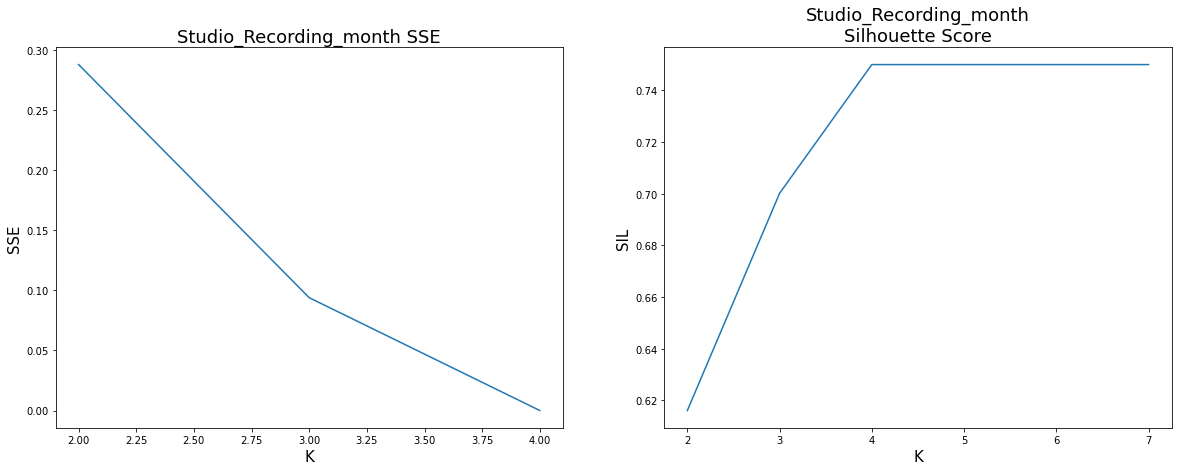

In [107]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [108]:
cluster_centers_studio_sax_dtw, dict_label_studio_sax_dtw, \
labels_studio_sax_dtw = run_kmeans(4, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 3, 1: 3, 2: 1, 3: 1}

SSE:  0.0
Silhouette Score:  0.75


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         3  4  4  3  3  3       0
2010_studio         3  3  3  3  4  4       2
2011_studio         4  3  3  4  3  3       3
2012_studio         4  3  4  3  4  4       1
2013_studio         3  4  3  3  3  3       0
2014_studio         4  3  4  4  3  4       1
2015_studio         3  3  4  3  3  3       0
2016_studio         4  3  4  3  4  4       1


Cluster 0
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 1
 ['2012_studio', '2014_studio', '2016_studio']

Cluster 2
 ['2010_studio']

Cluster 3
 ['2011_studio']




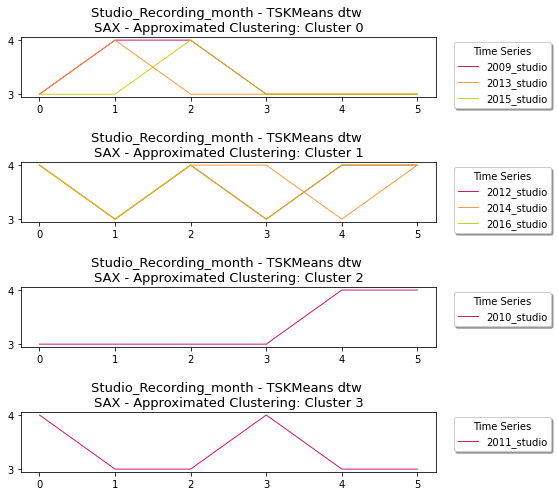

In [109]:
analyze_approximated_clusters(labels_studio_sax_dtw, X_sax, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

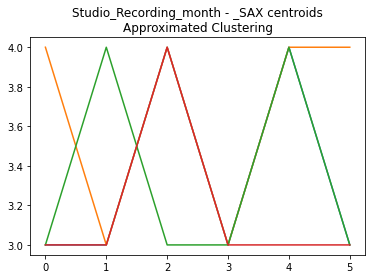

In [110]:
plot_centroids_approximated(cluster_centers_studio_sax_dtw, X_sax, album_type, '_SAX')

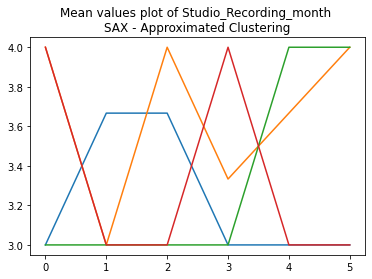

In [111]:
plot_mean_values_approximated(labels_studio_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [112]:
album_type = "Live_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [113]:
df_live

January  February  March  April  May  June  July  August  \
track_date_created                                                             
2009_live               275       205    327    385  186   243   225     148   
2010_live               162       148     28     95   64   150   202     103   
2011_live                77       100     62    144  111   263   133     154   
2012_live                31       214    181    114  268   123   121     115   
2013_live                41        92    129     60   58    94   147      73   
2014_live               110       109     37     35   61    17    27       7   
2015_live                62        65     20     54   38    22    30     116   
2016_live                59        91     49     28   50    91    13      55   

                    September  October  November  December  
track_date_created                                          
2009_live                 111      170       120       188  
2010_live                 109       94        68        61  
2011_live                 218      121       192       151  
2012_live                  46      101        39        68  
2013_live                  39       51        39        89  
2014_live                  27       35        11        19  
2015_live                  53        1        31        89  
2016_live                  19       30        59        83

In [114]:
df_live.shape

(8, 12)

In [115]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[275.],
        [205.],
        [327.],
        [385.],
        [186.],
        [243.],
        [225.],
        [148.],
        [111.],
        [170.],
        [120.],
        [188.]],

       [[162.],
        [148.],
        [ 28.],
        [ 95.],
        [ 64.],
        [150.],
        [202.],
        [103.],
        [109.],
        [ 94.],
        [ 68.],
        [ 61.]],

       [[ 77.],
        [100.],
        [ 62.],
        [144.],
        [111.],
        [263.],
        [133.],
        [154.],
        [218.],
        [121.],
        [192.],
        [151.]],

       [[ 31.],
        [214.],
        [181.],
        [114.],
        [268.],
        [123.],
        [121.],
        [115.],
        [ 46.],
        [101.],
        [ 39.],
        [ 68.]],

       [[ 41.],
        [ 92.],
        [129.],
        [ 60.],
        [ 58.],
        [ 94.],
        [147.],
        [ 73.],
        [ 39.],
        [ 51.],
        [ 39.],
        [ 89.]],

       [[110.],
        [109.]

In [116]:
tss_live.shape

(8, 12, 1)

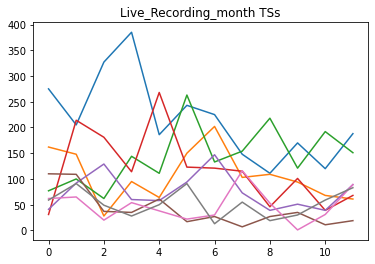

In [117]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [118]:
tss_live_scaled = TimeSeriesScalerMinMax().fit_transform(tss_live)
tss_live_scaled

array([[[0.59854015],
        [0.34306569],
        [0.78832117],
        [1.        ],
        [0.27372263],
        [0.48175182],
        [0.41605839],
        [0.1350365 ],
        [0.        ],
        [0.21532847],
        [0.03284672],
        [0.2810219 ]],

       [[0.77011494],
        [0.68965517],
        [0.        ],
        [0.38505747],
        [0.20689655],
        [0.70114943],
        [1.        ],
        [0.43103448],
        [0.46551724],
        [0.37931034],
        [0.22988506],
        [0.18965517]],

       [[0.07462687],
        [0.18905473],
        [0.        ],
        [0.4079602 ],
        [0.24378109],
        [1.        ],
        [0.35323383],
        [0.45771144],
        [0.7761194 ],
        [0.29353234],
        [0.64676617],
        [0.44278607]],

       [[0.        ],
        [0.7721519 ],
        [0.63291139],
        [0.35021097],
        [1.        ],
        [0.38818565],
        [0.37974684],
        [0.35443038],
        [0.06329114],
    

In [119]:
tss_live_scaled.shape

(8, 12, 1)

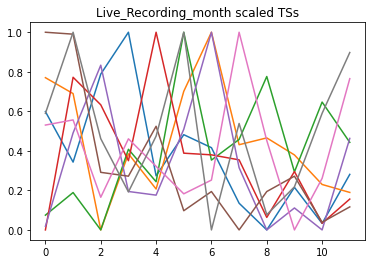

In [120]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [121]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  
track_date_created                      
2009_live           0.032847  0.281022  
2010_live           0.229885  0.189655  
2011_live           0.646766  0.442786  
2012_live           0.033755  0.156118  
2013_live           0.000000  0.462963  
2014_live           0.038835  0.116505  
2015_live           0.260870  0.765217  
2016_live           0.589744  0.897436

<h3>Euclidean Distance</h3>

k:  2 SSE:  0.6781576888902411 Silhouette Score:  0.12046044831638164

k:  3 SSE:  0.5169804751116465 Silhouette Score:  0.10726074347802086

k:  4 SSE:  0.3849179528327278 Silhouette Score:  0.07569588090576511

k:  5 SSE:  0.28228622503077677 Silhouette Score:  0.04949320446149939

k:  6 SSE:  0.18314772744058105 Silhouette Score:  0.02910006856831429

k:  7 SSE:  0.08482835653711715 Silhouette Score:  0.013441857601508327



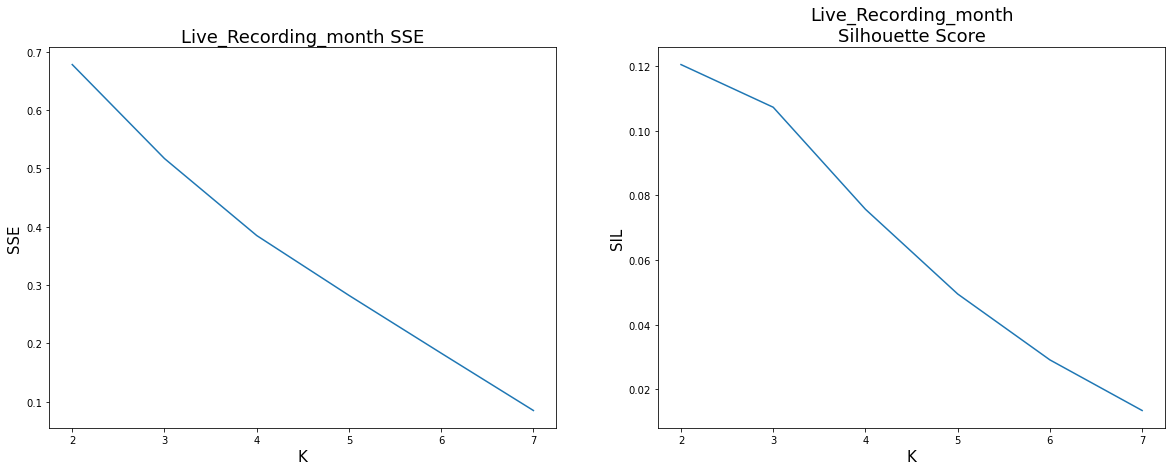

In [122]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [123]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(3, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 3, 1: 2, 2: 3}

SSE:  0.5169804751116465
Silhouette Score:  0.10726074347802086


In [124]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  Labels  
track_date_created                              
2009_live           0.032847  0.281022       2  
2010_live           0.229885  0.189655       1  
2011_live           0.646766  0.442786       0  
2012_live           0.033755  0.156118       2  
2013_live           0.000000  0.462963       2  
2014_live           0.038835  0.116505       1  
2015_live           0.260870  0.765217       0  
2016_live           0.589744  0.897436       0

Cluster 0
 ['2011_live', '2015_live', '2016_live']

Cluster 1
 ['2010_live', '2014_live']

Cluster 2
 ['2009_live', '2012_live', '2013_live']



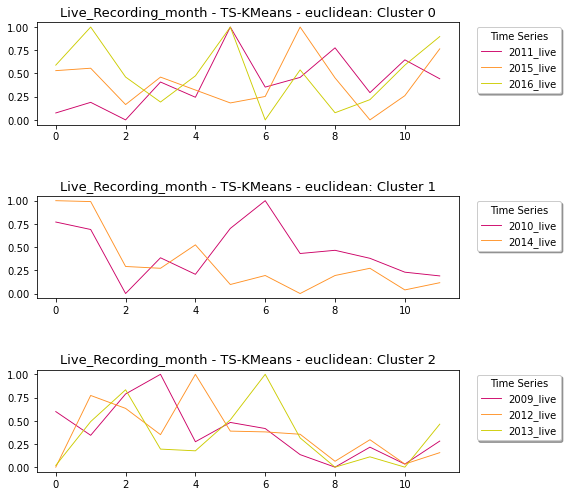

In [125]:
analyze_clusters(labels_live_eu, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

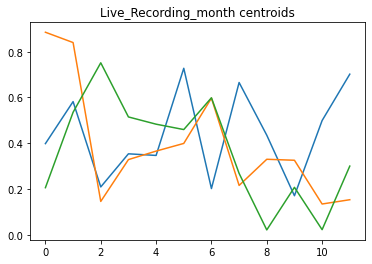

In [126]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  0.29501343248766465 Silhouette Score:  0.1981706305696001

k:  3 SSE:  0.20426073280705764 Silhouette Score:  0.17816232336401017

k:  4 SSE:  0.14661859780441744 Silhouette Score:  0.10903611298924548

k:  5 SSE:  0.08281873064931147 Silhouette Score:  0.11207959736292979

k:  6 SSE:  0.04136251461756132 Silhouette Score:  0.11964291417058134

k:  7 SSE:  0.020150310951003007 Silhouette Score:  0.06466850585778416



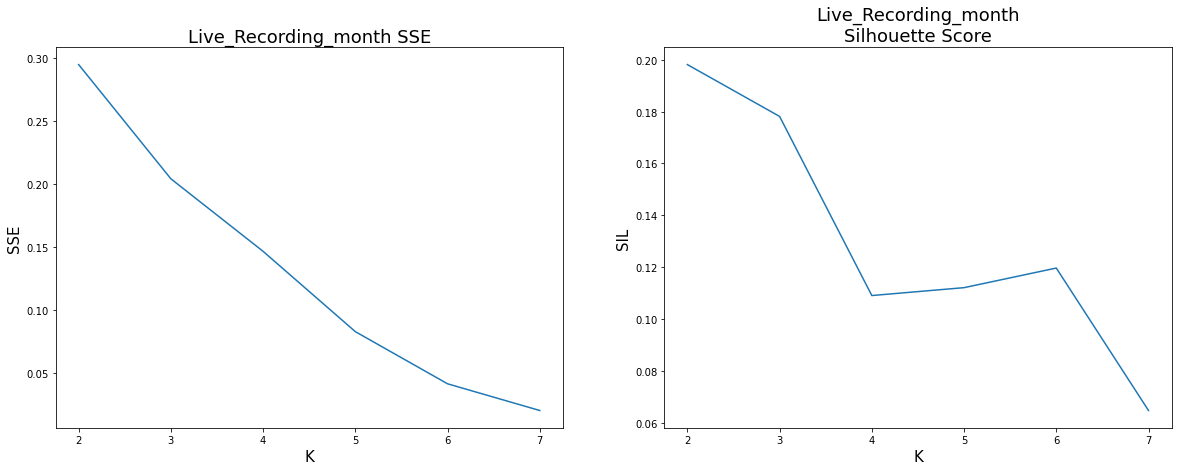

In [127]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [128]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(3, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  0.20426073280705764
Silhouette Score:  0.17816232336401017


In [129]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  Labels  
track_date_created                              
2009_live           0.032847  0.281022       0  
2010_live           0.229885  0.189655       0  
2011_live           0.646766  0.442786       1  
2012_live           0.033755  0.156118       1  
2013_live           0.000000  0.462963       1  
2014_live           0.038835  0.116505       0  
2015_live           0.260870  0.765217       0  
2016_live           0.589744  0.897436       2

Cluster 0
 ['2009_live', '2010_live', '2014_live', '2015_live']

Cluster 1
 ['2011_live', '2012_live', '2013_live']

Cluster 2
 ['2016_live']



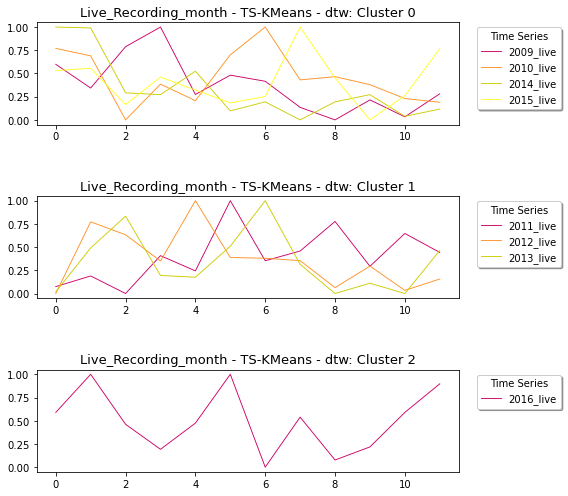

In [130]:
analyze_clusters(labels_live_dtw, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

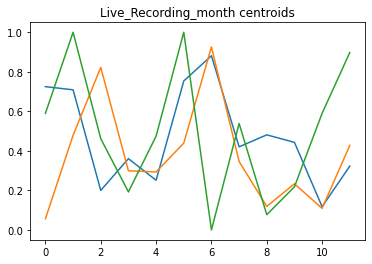

In [131]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  5.42526151112193 Silhouette Score:  0.12046044831638165
Calinski-Harabaz:  2.1860574444358725 Davies-Bouldin:  1.6497299477655747

k:  3 SSE:  4.135843800893171 Silhouette Score:  0.10726074347802089
Calinski-Harabaz:  1.9742484362703319 Davies-Bouldin:  1.2829686198173678

k:  4 SSE:  3.0793436226618223 Silhouette Score:  0.07569588090576518
Calinski-Harabaz:  1.8716427786964713 Davies-Bouldin:  1.0040385209032479

k:  5 SSE:  2.258289800246214 Silhouette Score:  0.0494932044614995
Calinski-Harabaz:  1.70824862559098 Davies-Bouldin:  0.7621196603652979

k:  6 SSE:  1.4651818195246484 Silhouette Score:  0.029100068568314333
Calinski-Harabaz:  1.620750452916011 Davies-Bouldin:  0.533511015062098

k:  7 SSE:  0.6786268522969372 Silhouette Score:  0.013441857601508353
Calinski-Harabaz:  1.6511995727030007 Davies-Bouldin:  0.4510082357866617



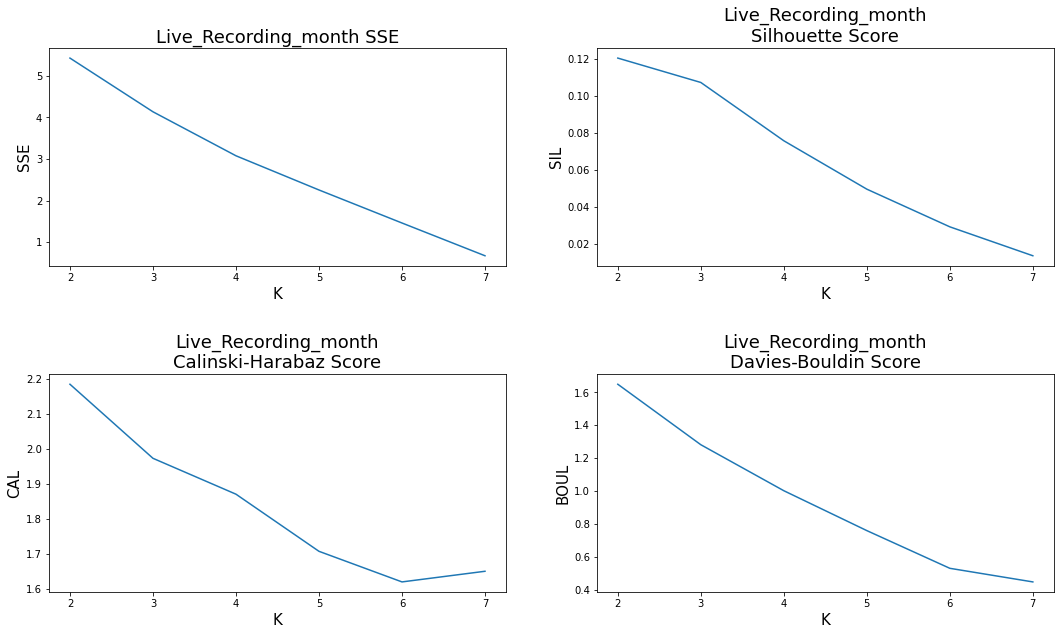

In [132]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

In [133]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(3, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (3, 12)

Labels:  {0: 3, 1: 2, 2: 3}

SSE:  4.135843800893171
Silhouette Score:  0.10726074347802089
Calinski - Harabaz Score:  1.9742484362703319
Davies - Bouldin Score:  1.2829686198173678


In [134]:
cluster_insight(df_tss_live_scaled, labels_live_2)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  Labels  
track_date_created                              
2009_live           0.032847  0.281022       2  
2010_live           0.229885  0.189655       1  
2011_live           0.646766  0.442786       0  
2012_live           0.033755  0.156118       2  
2013_live           0.000000  0.462963       2  
2014_live           0.038835  0.116505       1  
2015_live           0.260870  0.765217       0  
2016_live           0.589744  0.897436       0

Cluster 0
 ['2011_live', '2015_live', '2016_live']

Cluster 1
 ['2010_live', '2014_live']

Cluster 2
 ['2009_live', '2012_live', '2013_live']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [135]:
F = [list(calculate_features(x).values())for x in tss_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  0.5983778287591304 Silhouette Score:  0.5525316301166199
Calinski-Harabaz:  11.085175291984335 Davies-Bouldin:  0.5409056841318362

k:  3 SSE:  0.1950659115552237 Silhouette Score:  0.5325751416089649
Calinski-Harabaz:  19.33746939192153 Davies-Bouldin:  0.35607727810309026

k:  4 SSE:  0.09032513008272619 Silhouette Score:  0.3993134615198214
Calinski-Harabaz:  23.81874188113152 Davies-Bouldin:  0.17253017876166557

k:  5 SSE:  0.03516563377624794 Silhouette Score:  0.22573894013548995
Calinski-Harabaz:  35.59013167598572 Davies-Bouldin:  0.2096473559581938

k:  6 SSE:  0.008674055159646574 Silhouette Score:  0.1926950874578912
Calinski-Harabaz:  78.17447608240545 Davies-Bouldin:  0.16884432286803483

k:  7 SSE:  0.0007715195011671353 Silhouette Score:  0.16103324187502704
Calinski-Harabaz:  367.9161332755629 Davies-Bouldin:  0.0917518761338053



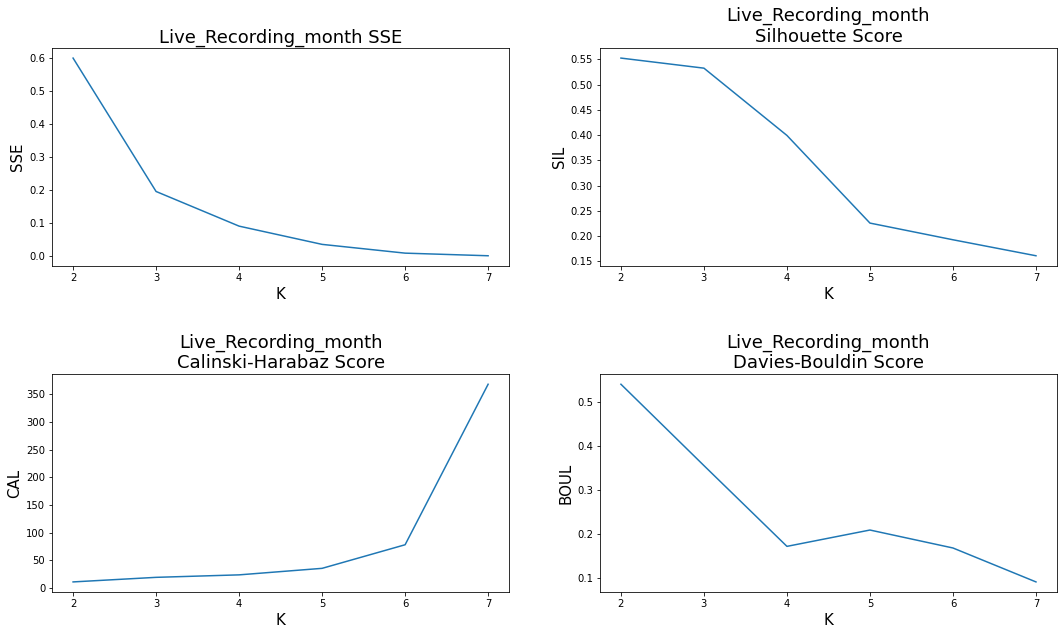

In [136]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [137]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  0.1950659115552237
Silhouette Score:  0.5325751416089649
Calinski - Harabaz Score:  19.33746939192153
Davies - Bouldin Score:  0.35607727810309026


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

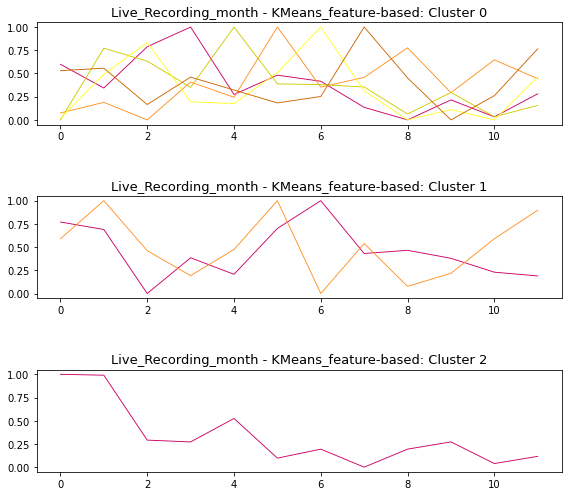

In [138]:
analyze_clusters_fb(labels_live_fb, tss_live_scaled, album_type, 'KMeans_feature-based', False)

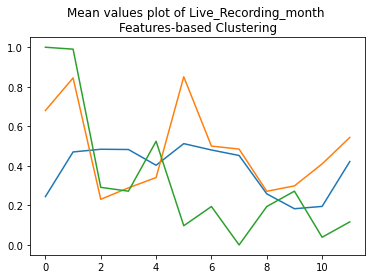

In [139]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [140]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [141]:
print(tss_live_scaled.shape, M.shape)

(8, 12, 1) (8, 8)


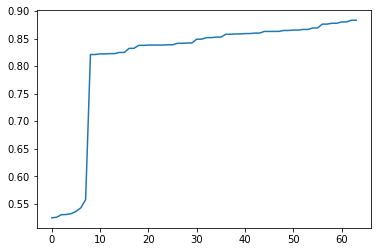

In [142]:
plt.plot(sorted(M.ravel()))
plt.show()

In [143]:
dbscan_compression_live = DBSCAN(eps=0.83, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.83, metric='precomputed')

In [144]:
dbscan_compression_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [145]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

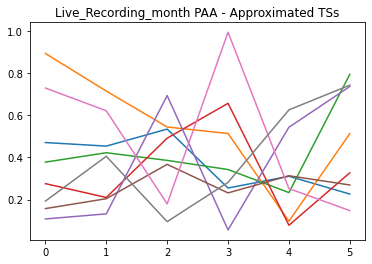

In [146]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  0.1944987093962301 Silhouette Score:  0.1383873884503821

k:  3 SSE:  0.14011210961643455 Silhouette Score:  0.14192350986564842

k:  4 SSE:  0.09454131221866204 Silhouette Score:  0.1398567498317973

k:  5 SSE:  0.051489199793018636 Silhouette Score:  0.15898676181055088

k:  6 SSE:  0.030506780486909864 Silhouette Score:  0.08570721711303617

k:  7 SSE:  0.014283192611590256 Silhouette Score:  0.040141680415336986



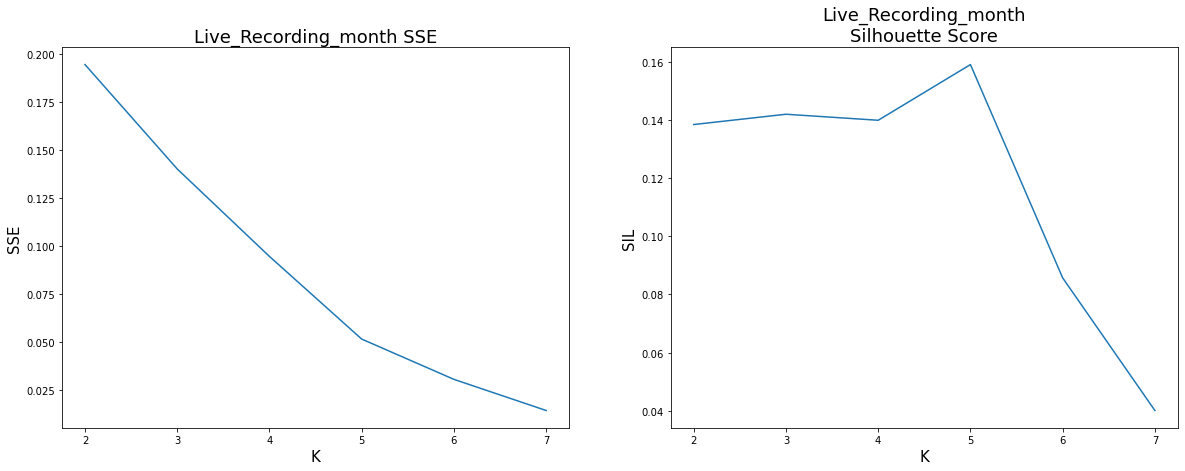

In [147]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [148]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(5, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (5, 6, 1)

Labels:  {0: 3, 1: 1, 2: 1, 3: 2, 4: 1}

SSE:  0.051489199793018636
Silhouette Score:  0.15898676181055088


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.470803  0.894161  0.377737  0.275547  0.107664   
2010_live           0.729885  0.192529  0.454023  0.715517  0.422414   
2011_live           0.131841  0.203980  0.621891  0.405473  0.534826   
2012_live           0.386076  0.491561  0.694093  0.367089  0.179325   
2013_live           0.254630  0.513889  0.342593  0.657407  0.055556   
2014_live           0.995146  0.281553  0.310680  0.097087  0.233010   
2015_live           0.543478  0.313043  0.252174  0.626087  0.226087   
2016_live           0.794872  0.326923  0.737179  0.269231  0.147436   

                           5  Labels  
track_date_created                    
2009_live           0.156934       0  
2010_live           0.209770       3  
2011_live           0.544776       4  
2012_live           0.094937       0  
2013_live           0.231481       0  
2014_live           0.077670       1  
2015_live           0.513043       3  
2016_live           0.743590       2


Cluster 0
 ['2009_live', '2012_live', '2013_live']

Cluster 1
 ['2014_live']

Cluster 2
 ['2016_live']

Cluster 3
 ['2010_live', '2015_live']

Cluster 4
 ['2011_live']




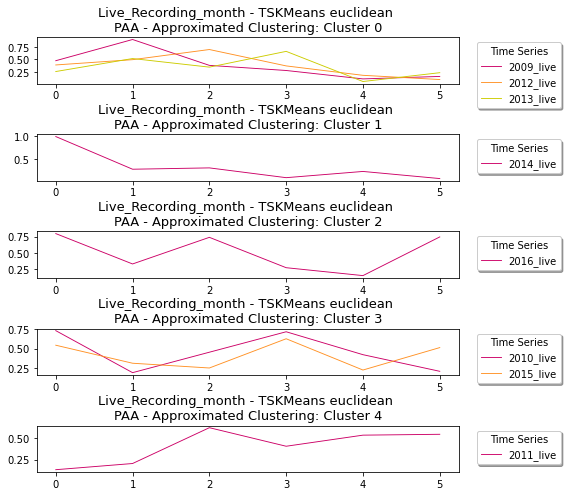

In [149]:
analyze_approximated_clusters(labels_live_paa, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

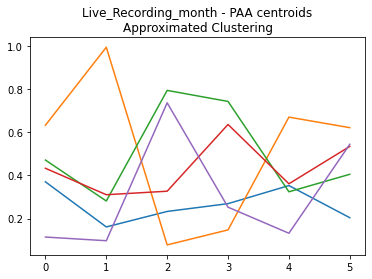

In [150]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type, 'PAA')

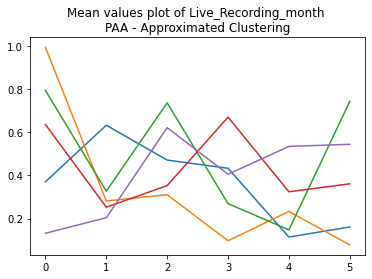

In [151]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.12364128384723018 Silhouette Score:  0.13772060852040546

k:  3 SSE:  0.07985350676510133 Silhouette Score:  0.18870512428595554

k:  4 SSE:  0.0495357919102249 Silhouette Score:  0.21443873096714772

k:  5 SSE:  0.029430715443851944 Silhouette Score:  0.14461203329193878

k:  6 SSE:  0.012772521248100917 Silhouette Score:  0.1685718762770527

k:  7 SSE:  0.0038311041281084706 Silhouette Score:  0.10301297456291303



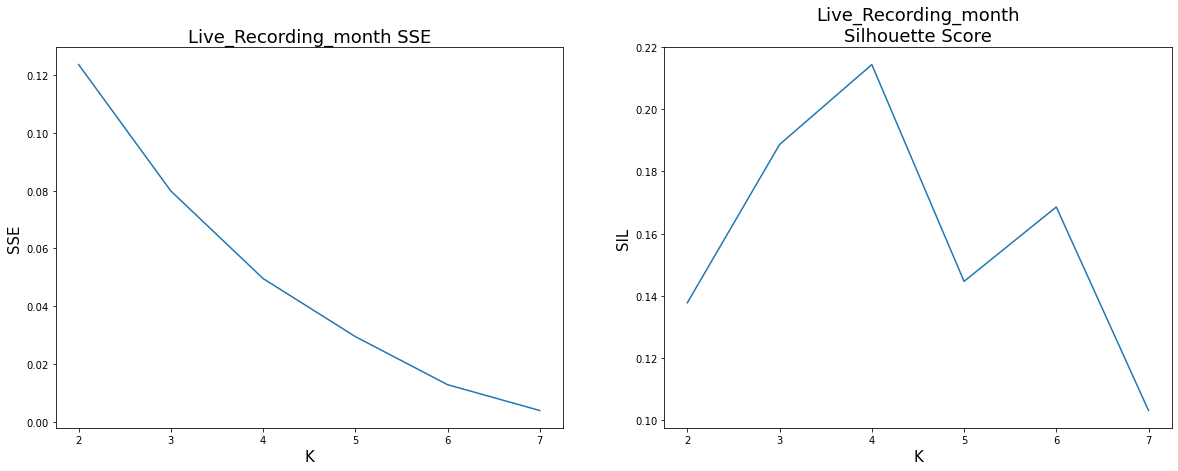

In [152]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [153]:
cluster_centers_live_paa_dtw, dict_label_live_paa_dtw, labels_live_paa_dtw = run_kmeans(4, 300, 10, 'dtw', X_paa,\
                                                                      False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 2, 1: 4, 2: 1, 3: 1}

SSE:  0.0495357919102249
Silhouette Score:  0.21443873096714772


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.470803  0.894161  0.377737  0.275547  0.107664   
2010_live           0.729885  0.192529  0.454023  0.715517  0.422414   
2011_live           0.131841  0.203980  0.621891  0.405473  0.534826   
2012_live           0.386076  0.491561  0.694093  0.367089  0.179325   
2013_live           0.254630  0.513889  0.342593  0.657407  0.055556   
2014_live           0.995146  0.281553  0.310680  0.097087  0.233010   
2015_live           0.543478  0.313043  0.252174  0.626087  0.226087   
2016_live           0.794872  0.326923  0.737179  0.269231  0.147436   

                           5  Labels  
track_date_created                    
2009_live           0.156934       1  
2010_live           0.209770       1  
2011_live           0.544776       3  
2012_live           0.094937       1  
2013_live           0.231481       1  
2014_live           0.077670       2  
2015_live           0.513043       0  
2016_live           0.743590       0


Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live']

Cluster 2
 ['2014_live']

Cluster 3
 ['2011_live']




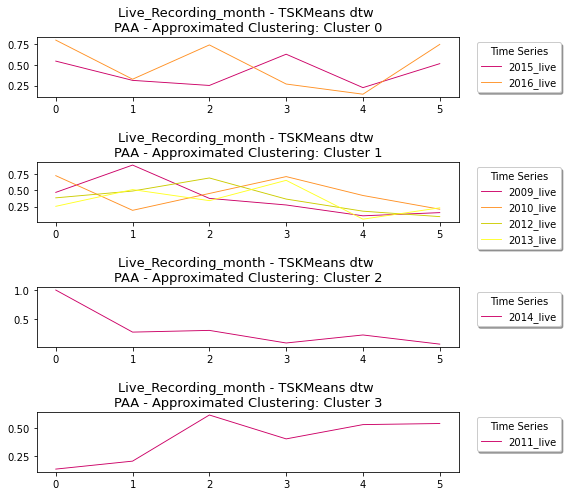

In [154]:
analyze_approximated_clusters(labels_live_paa_dtw, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

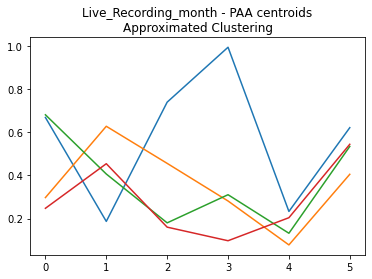

In [155]:
plot_centroids_approximated(cluster_centers_live_paa_dtw, X_paa, album_type, 'PAA')

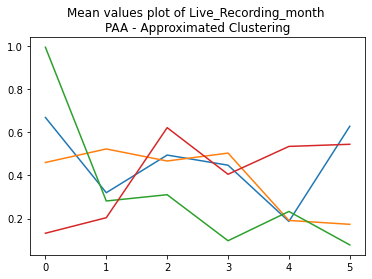

In [156]:
plot_mean_values_approximated(labels_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [157]:
n_sax1d_segments = 6
n_sax_symbols_avg = 6
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_live_scaled)

In [158]:
#plt.plot(X_sax1d.reshape(X_sax1d.shape[1], X_sax1d.shape[0]))
#plt.title(album_type + "\nOneD_Sax - Approximated TSs")
#plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  7.850000000000001 Silhouette Score:  0.1953993514122897

k:  3 SSE:  5.520833333333334 Silhouette Score:  0.16618817982907613

k:  4 SSE:  4.0 Silhouette Score:  0.13414506048205016

k:  5 SSE:  2.8125 Silhouette Score:  0.07577376872117314

k:  6 SSE:  1.75 Silhouette Score:  0.04905407084266192

k:  7 SSE:  0.7499999999999999 Silhouette Score:  0.018544975056862145



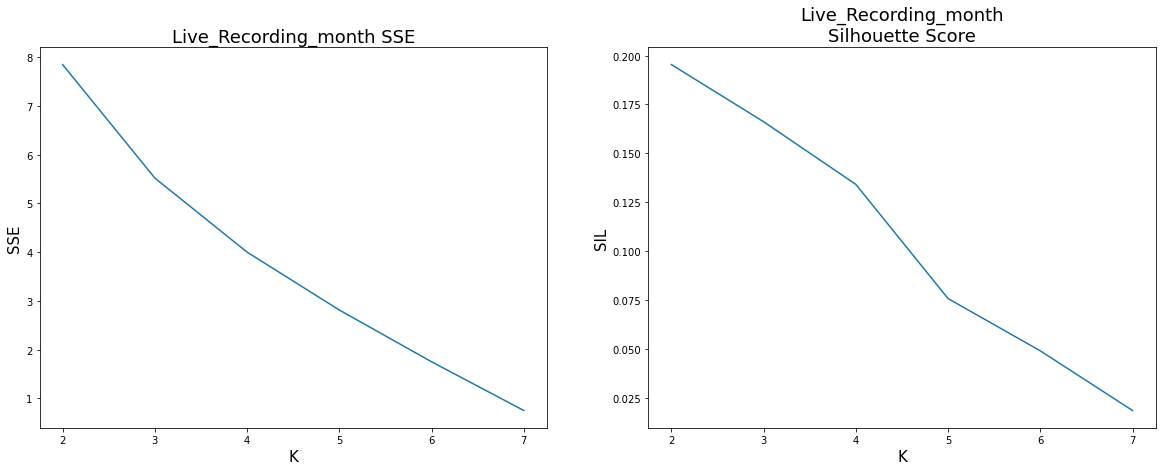

In [159]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [161]:
cluster_centers_live_sax1d, dict_label_live_sax1d, \
labels_live_sax1d = run_kmeans(3, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (3, 6, 2)

Labels:  {0: 3, 1: 3, 2: 2}

SSE:  5.520833333333334
Silhouette Score:  0.16618817982907613


In [162]:
#analyze_approximated_clusters(labels_live_sax1d, X_sax1d, df_tss_live_scaled, \
#                              album_type, \
#                              '\nTSKMeans - OneD_SAX - Approximated Clustering', True)

In [163]:
#plot_centroids_approximated(cluster_centers_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

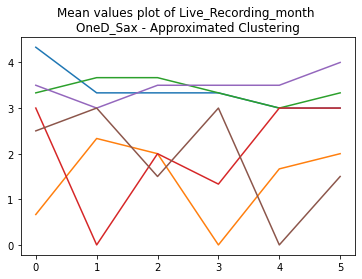

In [164]:
plot_mean_values_approximated(labels_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  4.716517857142857 Silhouette Score:  0.2704291540370968

k:  3 SSE:  3.2 Silhouette Score:  0.12870253295506184

k:  4 SSE:  2.28125 Silhouette Score:  0.172640490387321

k:  5 SSE:  1.3854166666666665 Silhouette Score:  0.17065981438943412

k:  6 SSE:  0.8020833333333334 Silhouette Score:  0.10335038778867553

k:  7 SSE:  0.37499999999999994 Silhouette Score:  0.009272487528431083



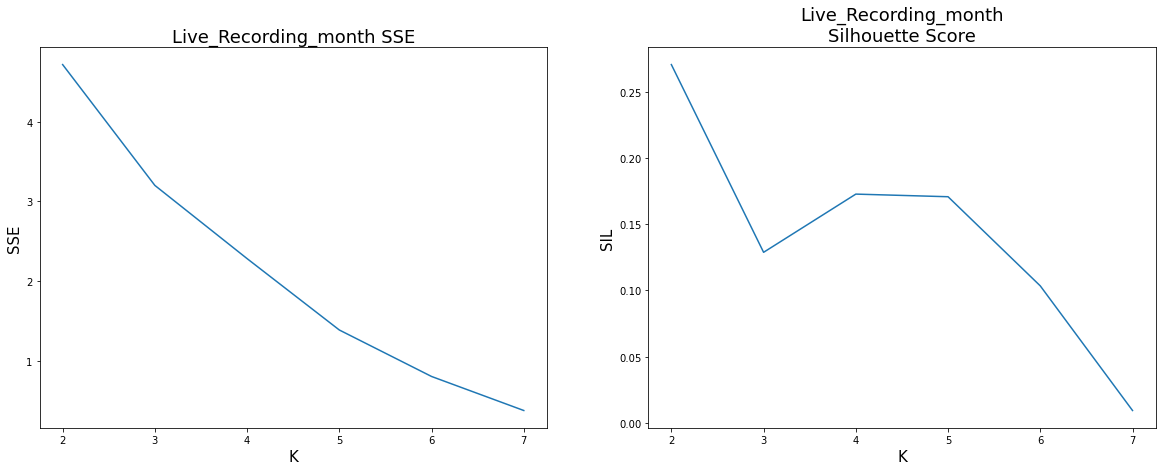

In [165]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [166]:
cluster_centers_live_sax1d_dtw, dict_label_live_sax1d_dtw, \
labels_live_sax1d_dtw = run_kmeans(4, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (4, 6, 2)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  2.28125
Silhouette Score:  0.172640490387321


In [167]:
#analyze_approximated_clusters(labels_studio_sax1d_dtw, X_sax1d, df_tss_studio_scaled, album_type, \
#                               'TSKMeans dtw \nOneD_SAX - Approximated Clustering', False)

In [168]:
#plot_centroids_approximated(cluster_centers_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

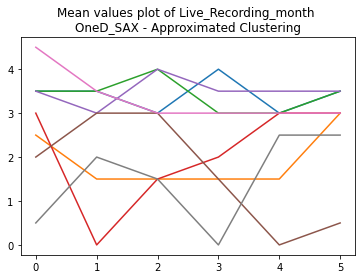

In [169]:
plot_mean_values_approximated(labels_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [170]:
n_sax_segments = 6
n_sax_symbols = 6

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_live_scaled)

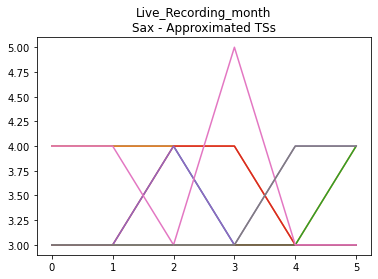

In [171]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  1.0499999999999998 Silhouette Score:  0.16276070076694857

k:  3 SSE:  0.7187499999999999 Silhouette Score:  0.13289325138758373

k:  4 SSE:  0.5 Silhouette Score:  0.10077618436292536

k:  5 SSE:  0.375 Silhouette Score:  0.045875854768068464

k:  6 SSE:  0.25 Silhouette Score:  0.045875854768068464

k:  7 SSE:  0.12500000000000003 Silhouette Score:  0.0



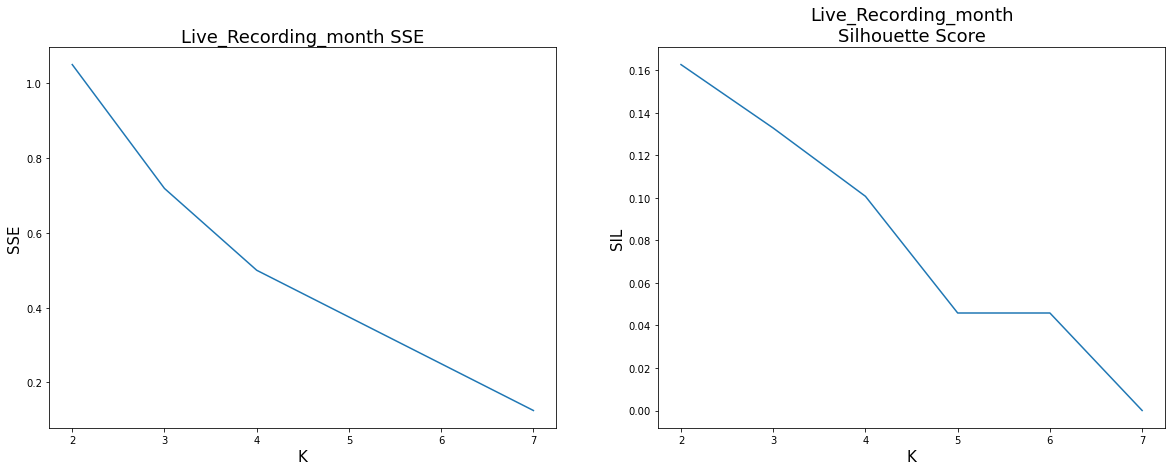

In [172]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [173]:
cluster_centers_live_sax, dict_label_live_sax, \
labels_live_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  0.7187499999999999
Silhouette Score:  0.13289325138758373


0  1  2  3  4  5  Labels
track_date_created                          
2009_live           4  4  3  3  3  3       0
2010_live           4  3  4  4  3  3       1
2011_live           3  3  4  3  4  4       2
2012_live           3  4  4  3  3  3       0
2013_live           3  4  3  4  3  3       0
2014_live           5  3  3  3  3  3       1
2015_live           4  3  3  4  3  4       1
2016_live           4  3  4  3  3  4       1


Cluster 0
 ['2009_live', '2012_live', '2013_live']

Cluster 1
 ['2010_live', '2014_live', '2015_live', '2016_live']

Cluster 2
 ['2011_live']




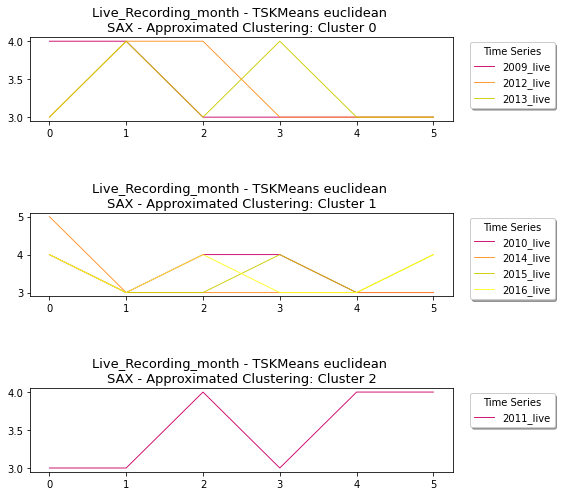

In [174]:
analyze_approximated_clusters(labels_live_sax, X_sax, df_tss_live_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

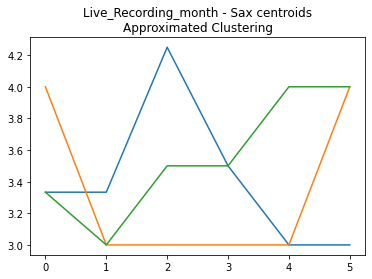

In [175]:
plot_centroids_approximated(cluster_centers_live_sax, X_sax, album_type, 'Sax')

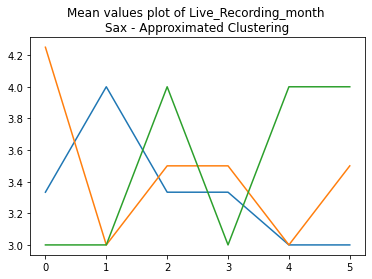

In [176]:
plot_mean_values_approximated(labels_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  0.5535714285714286 Silhouette Score:  0.28792835905335507

k:  3 SSE:  0.2976190476190476 Silhouette Score:  0.31336049715738795

k:  4 SSE:  0.20833333333333331 Silhouette Score:  0.2252718515919601

k:  5 SSE:  0.125 Silhouette Score:  0.28661165235168157

k:  6 SSE:  0.0625 Silhouette Score:  0.25

k:  7 SSE:  0.0 Silhouette Score:  0.25



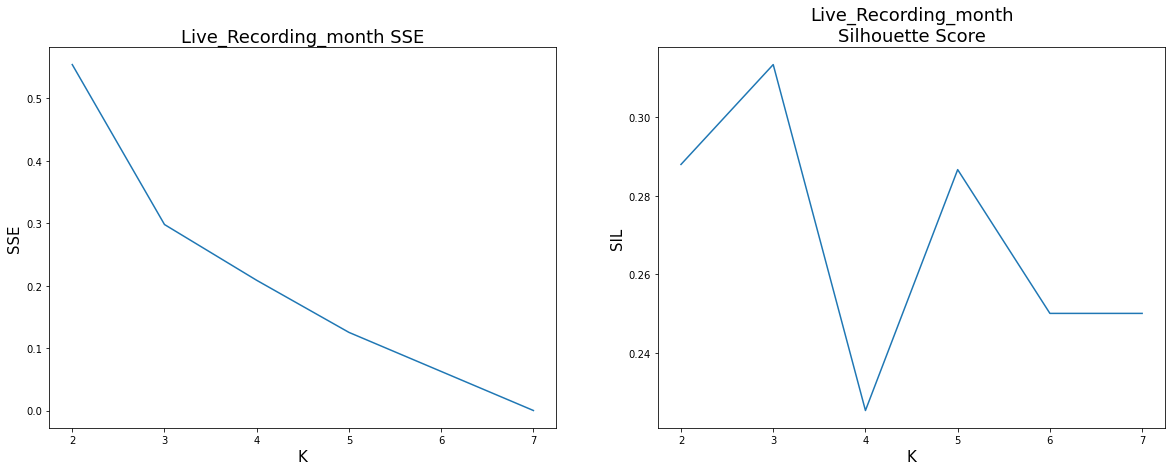

In [177]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [178]:
cluster_centers_live_sax_dtw, dict_label_live_sax_dtw, \
labels_live_sax_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  0.2976190476190476
Silhouette Score:  0.31336049715738795


0  1  2  3  4  5  Labels
track_date_created                          
2009_live           4  4  3  3  3  3       1
2010_live           4  3  4  4  3  3       1
2011_live           3  3  4  3  4  4       0
2012_live           3  4  4  3  3  3       1
2013_live           3  4  3  4  3  3       1
2014_live           5  3  3  3  3  3       2
2015_live           4  3  3  4  3  4       0
2016_live           4  3  4  3  3  4       0


Cluster 0
 ['2011_live', '2015_live', '2016_live']

Cluster 1
 ['2009_live', '2010_live', '2012_live', '2013_live']

Cluster 2
 ['2014_live']




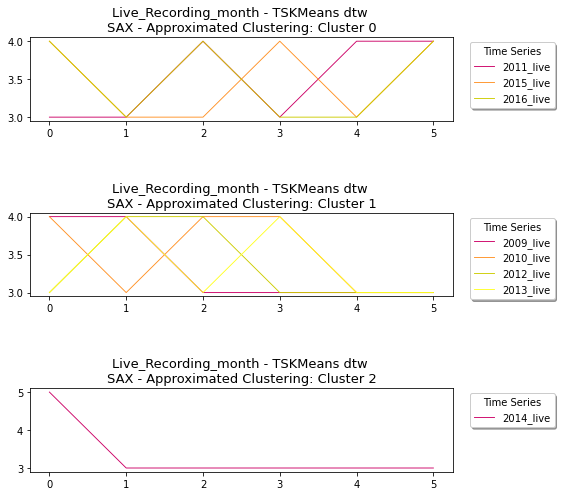

In [179]:
analyze_approximated_clusters(labels_live_sax_dtw, X_sax, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

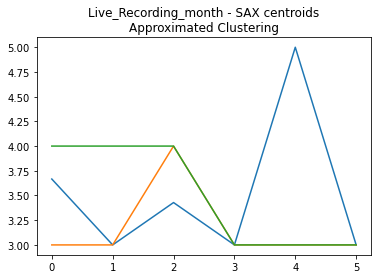

In [180]:
plot_centroids_approximated(cluster_centers_live_sax_dtw, X_sax, album_type, 'SAX')

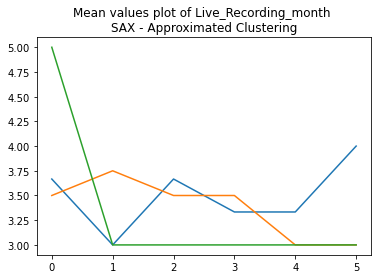

In [181]:
plot_mean_values_approximated(labels_live_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [182]:
album_type = "Studio_Recording_month - Live_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [183]:
df_studio_live

January  February  March  April   May  June  July  August  \
track_date_created                                                              
2009_studio             131       145    486   1501  1477   904  1005     353   
2010_studio             949       811    835    754  1180   761   786    1031   
2011_studio            1030       979    855    622   584   664  1145     988   
2012_studio            1103      1194    894    637  1172   992   652     595   
2013_studio            1397       753    954   1946  1122   958   651     695   
2014_studio             789       982    610    658  1150   614   604     815   
2015_studio             737      1051    998    975  1732   948   825     773   
2016_studio            1307      1376   1017    906  1494  1033   917     809   
2009_live               275       205    327    385   186   243   225     148   
2010_live               162       148     28     95    64   150   202     103   
2011_live                77       100     62    144   111   263   133     154   
2012_live                31       214    181    114   268   123   121     115   
2013_live                41        92    129     60    58    94   147      73   
2014_live               110       109     37     35    61    17    27       7   
2015_live                62        65     20     54    38    22    30     116   
2016_live                59        91     49     28    50    91    13      55   

                    September  October  November  December  
track_date_created                                          
2009_studio               321      555       731       657  
2010_studio               968     1001      1151      1263  
2011_studio               585      741       527       802  
2012_studio               650     1144       806       906  
2013_studio               842      939      1016      1303  
2014_studio               332      803       789      1025  
2015_studio               946      937      1069       932  
2016_studio              1493      941       987      1282  
2009_live                 111      170       120       188  
2010_live                 109       94        68        61  
2011_live                 218      121       192       151  
2012_live                  46      101        39        68  
2013_live                  39       51        39        89  
2014_live                  27       35        11        19  
2015_live                  53        1        31        89  
2016_live                  19       30        59        83

In [184]:
df_studio_live.shape

(16, 12)

In [185]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[1.310e+02],
        [1.450e+02],
        [4.860e+02],
        [1.501e+03],
        [1.477e+03],
        [9.040e+02],
        [1.005e+03],
        [3.530e+02],
        [3.210e+02],
        [5.550e+02],
        [7.310e+02],
        [6.570e+02]],

       [[9.490e+02],
        [8.110e+02],
        [8.350e+02],
        [7.540e+02],
        [1.180e+03],
        [7.610e+02],
        [7.860e+02],
        [1.031e+03],
        [9.680e+02],
        [1.001e+03],
        [1.151e+03],
        [1.263e+03]],

       [[1.030e+03],
        [9.790e+02],
        [8.550e+02],
        [6.220e+02],
        [5.840e+02],
        [6.640e+02],
        [1.145e+03],
        [9.880e+02],
        [5.850e+02],
        [7.410e+02],
        [5.270e+02],
        [8.020e+02]],

       [[1.103e+03],
        [1.194e+03],
        [8.940e+02],
        [6.370e+02],
        [1.172e+03],
        [9.920e+02],
        [6.520e+02],
        [5.950e+02],
        [6.500e+02],
        [1.144e+03],
        [8.060e+02],
       

In [186]:
tss_studio_live.shape

(16, 12, 1)

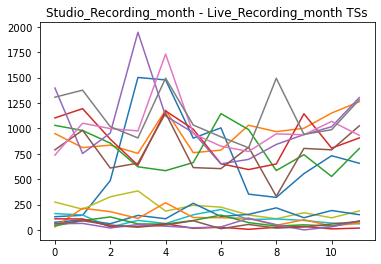

In [187]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [188]:
tss_studio_live_scaled = TimeSeriesScalerMinMax().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[0.        ],
        [0.01021898],
        [0.25912409],
        [1.        ],
        [0.98248175],
        [0.56423358],
        [0.6379562 ],
        [0.1620438 ],
        [0.13868613],
        [0.30948905],
        [0.4379562 ],
        [0.38394161]],

       [[0.38310413],
        [0.11198428],
        [0.15913556],
        [0.        ],
        [0.83693517],
        [0.01375246],
        [0.06286837],
        [0.54420432],
        [0.42043222],
        [0.48526523],
        [0.77996071],
        [1.        ]],

       [[0.81391586],
        [0.73139159],
        [0.53074434],
        [0.15372168],
        [0.09223301],
        [0.22168285],
        [1.        ],
        [0.74595469],
        [0.09385113],
        [0.34627832],
        [0.        ],
        [0.44498382]],

       [[0.84808013],
        [1.        ],
        [0.49916528],
        [0.07011686],
        [0.96327212],
        [0.66277129],
        [0.0951586 ],
        [0.        ],
        [0.0918197 ],
    

In [189]:
tss_studio_live_scaled.shape

(16, 12, 1)

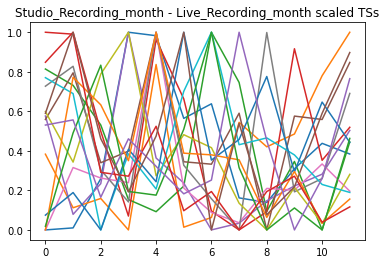

In [190]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [191]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  
track_date_created                      
2009_studio         0.437956  0.383942  
2010_studio         0.779961  1.000000  
2011_studio         0.000000  0.444984  
2012_studio         0.352254  0.519199  
2013_studio         0.281853  0.503475  
2014_studio         0.558680  0.847188  
2015_studio         0.333668  0.195980  
2016_studio         0.259854  0.690511  
2009_live           0.032847  0.281022  
2010_live           0.229885  0.189655  
2011_live           0.646766  0.442786  
2012_live           0.033755  0.156118  
2013_live           0.000000  0.462963  
2014_live           0.038835  0.116505  
2015_live           0.260870  0.765217  
2016_live           0.589744  0.897436

<h3>Euclidean Distance</h3>

k:  2 SSE:  0.8639864847344656 Silhouette Score:  0.09484923405683472

k:  3 SSE:  0.7060870658156189 Silhouette Score:  0.11963588358245991

k:  4 SSE:  0.5985155583336548 Silhouette Score:  0.1145636355757211

k:  5 SSE:  0.49855048167053284 Silhouette Score:  0.12536435442282734

k:  6 SSE:  0.43916788316100663 Silhouette Score:  0.13205549183835338

k:  7 SSE:  0.3575171791665414 Silhouette Score:  0.13241634346460404

k:  8 SSE:  0.28928401914301227 Silhouette Score:  0.12674114828453967

k:  9 SSE:  0.25231331809732915 Silhouette Score:  0.11171833201361842

k:  10 SSE:  0.1929754162885388 Silhouette Score:  0.11175111876710432

k:  11 SSE:  0.14828236132279274 Silhouette Score:  0.09703173953662655

k:  12 SSE:  0.10747549849608988 Silhouette Score:  0.09086500928528249

k:  13 SSE:  0.07493274807291259 Silhouette Score:  0.08246155141000752

k:  14 SSE:  0.04560951120080224 Silhouette Score:  0.06264250529821694

k:  15 SSE:  0.02178960296982123 Silhouette Score:  0.03106518338

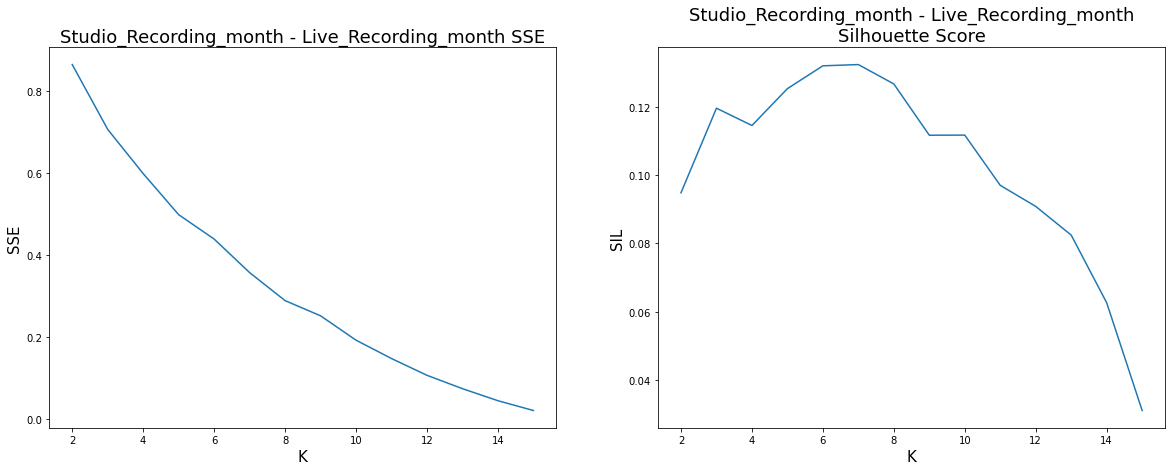

In [193]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

**We can see that best k is 7**

In [194]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(7, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (7, 12, 1)

Labels:  {0: 2, 1: 3, 2: 2, 3: 3, 4: 1, 5: 1, 6: 4}

SSE:  0.3575171791665414
Silhouette Score:  0.13241634346460404


def cluster_insight_studio_live(df_to_copy, labels):

    df = df_to_copy.copy()
    df['Labels'] = labels
    
    print("Dataset con le labels associate")
    ipd.display(df)
    
    cluster_dict = pd.DataFrame(columns = ["Studio_Recording", "Live_Recording"], \
                                index = ["Cluster {}".format(str(i)) for i in np.unique(df['Labels'])])
    
    tot_entropies = []
    dim_clusters = []
    max_cluster = 0
    
    for i in np.unique(df['Labels']):
        
        cluster_list = list(df[df['Labels'] == i].index)
                            
        print("Cluster {}\n".format(i), cluster_list)
        
        raw_elements = [elem.split("_")[1] for elem in cluster_list]
        counter = collections.Counter(raw_elements)
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Studio_Recording'] = counter['studio']
        cluster_dict.loc["Cluster {}".format(str(i)), 'Live_Recording'] = counter['live']
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = cluster_dict.loc["Cluster {}".format(str(i)), ['Studio_Recording', 'Live_Recording']].sum()
        
        lista = cluster_dict.loc['Cluster {}'.format(str(i)), ['Studio_Recording', 'Live_Recording']].values.tolist()
        tot = sum(lista)
        dim_clusters.append(tot)
        
        '''
        Entropia singola: -(sommatoria di (pij log2 pij) per tutte le classi all'interno di un cluster.
        --> pij = mij/mj dove mj è il numero di valori nel cluster j e mij è il numero di valori della classe i
        nel cluster j.
        '''
        entropy_single = -sum([(x/tot)*math.log2(x/tot) for x in lista if x != 0])
        cluster_dict.loc["Cluster {}".format(str(i)), 'Entropy'] = "%.4f" %(entropy_single)
        tot_entropies.append(entropy_single)
        
        
        '''
        Purity singola: etichetta della classe più frequente/numero di valori nel cluster
        '''
        purity_single = max(lista)/tot
        cluster_dict.loc["Cluster {}".format(str(i)), 'Purity'] = "%.4f" %(purity_single)

        max_cluster += max(lista)
        
        print()
        
    
    new_row = pd.Series(cluster_dict[['Studio_Recording', 'Live_Recording', 'Tot_Cluster']].sum(axis=0).astype(int), name = "Total")
    cluster_dict = cluster_dict.append(new_row, ignore_index=False)
    
    '''
    Entropia complessiva: sommatoria delle entropie di ogni cluster pesate per la dimensione di ogni cluster.
    --> (mj/m) * ej --> dove mj è la dimensione del cluster j e m è il numero totale di punti 
    (nel nostro caso 16). 
    '''
    
    last_tot = 16
    tot_entropy = 0

    for entropy, dim in zip(tot_entropies, dim_clusters):
        tot_entropy+=(entropy*(dim/last_tot))
        
    cluster_dict.loc["Total", 'Entropy'] = "%.4f" %(tot_entropy)
    
    '''
    Purity complessiva: sommatoria delle classi "corrette" (il valore più alto) di ogni cluster, divisa per il
    numero totale di valori (nel nostro caso 16).
    '''
    
    tot_purity = max_cluster/last_tot
    cluster_dict.loc["Total", 'Purity'] = "%.4f" %(tot_purity)
    
    
    
    cluster_dict['Tot_Cluster'] = cluster_dict['Tot_Cluster'].astype(int)
    
    
    ipd.display(cluster_dict)

In [195]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_eu)

Dataset con le labels associate


January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  Labels  
track_date_created                              
2009_studio         0.437956  0.383942       3  
2010_studio         0.779961  1.000000       6  
2011_studio         0.000000  0.444984       1  
2012_studio         0.352254  0.519199       2  
2013_studio         0.281853  0.503475       0  
2014_studio         0.558680  0.847188       6  
2015_studio         0.333668  0.195980       3  
2016_studio         0.259854  0.690511       5  
2009_live           0.032847  0.281022       0  
2010_live           0.229885  0.189655       1  
2011_live           0.646766  0.442786       4  
2012_live           0.033755  0.156118       3  
2013_live           0.000000  0.462963       1  
2014_live           0.038835  0.116505       2  
2015_live           0.260870  0.765217       6  
2016_live           0.589744  0.897436       6

Cluster 0
 ['2013_studio', '2009_live']

Cluster 1
 ['2011_studio', '2010_live', '2013_live']

Cluster 2
 ['2012_studio', '2014_live']

Cluster 3
 ['2009_studio', '2015_studio', '2012_live']

Cluster 4
 ['2011_live']

Cluster 5
 ['2016_studio']

Cluster 6
 ['2010_studio', '2014_studio', '2015_live', '2016_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                1              1            2   1.0000  0.5000
Cluster 1                1              2            3   0.9183  0.6667
Cluster 2                1              1            2   1.0000  0.5000
Cluster 3                2              1            3   0.9183  0.6667
Cluster 4                0              1            1  -0.0000  1.0000
Cluster 5                1              0            1  -0.0000  1.0000
Cluster 6                2              2            4   1.0000  0.5000
Total                    8              8           16   0.8444  0.6250

In [196]:
#-( (1/3)*math.log2(1/3) + (2/3)*math.log2(2/3) )

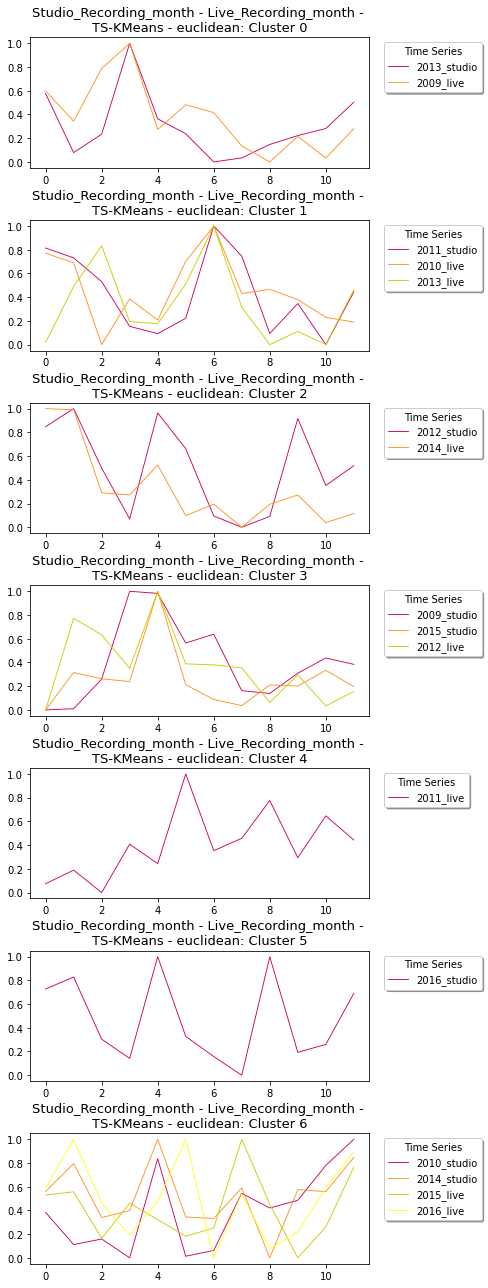

In [197]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 '\nTS-KMeans - euclidean', True)

**Centroids**

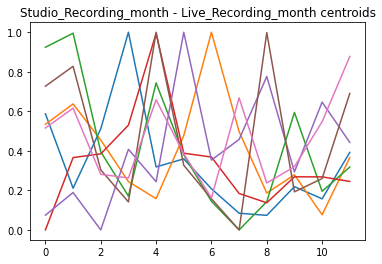

In [198]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  0.3385903410369446 Silhouette Score:  0.23977165393122762

k:  3 SSE:  0.26261290072663784 Silhouette Score:  0.20382367212767444

k:  4 SSE:  0.22388619235903337 Silhouette Score:  0.17849459456504363

k:  5 SSE:  0.1786837231841721 Silhouette Score:  0.1958210936101492

k:  6 SSE:  0.14951129395496432 Silhouette Score:  0.13148166441605885

k:  7 SSE:  0.10952774172381752 Silhouette Score:  0.18942030914219374

k:  8 SSE:  0.09418326361958561 Silhouette Score:  0.15829329356237978

k:  9 SSE:  0.0701967072566912 Silhouette Score:  0.16964133386973324

k:  10 SSE:  0.05415523042513336 Silhouette Score:  0.16608523759221222

k:  11 SSE:  0.043246658684564274 Silhouette Score:  0.13950670653763836

k:  12 SSE:  0.032634775751807454 Silhouette Score:  0.10482076030087115

k:  13 SSE:  0.022333912941159332 Silhouette Score:  0.08030815786945697

k:  14 SSE:  0.013713977561529032 Silhouette Score:  0.05100125612726368

k:  15 SSE:  0.006558850590461193 Silhouette Score:  0.0167

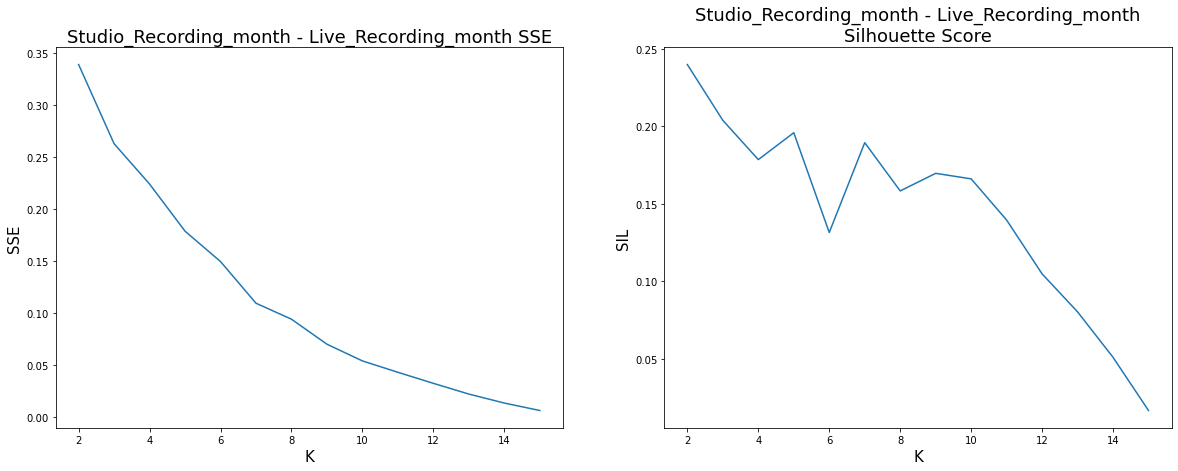

In [199]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 3**

In [200]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, \
labels_studio_live_dtw = run_kmeans(3, 1000, 10, 'dtw', tss_studio_live_scaled, False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 5, 1: 5, 2: 6}

SSE:  0.26261290072663784
Silhouette Score:  0.20382367212767444


In [201]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_dtw)

Dataset con le labels associate


January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  Labels  
track_date_created                              
2009_studio         0.437956  0.383942       1  
2010_studio         0.779961  1.000000       0  
2011_studio         0.000000  0.444984       2  
2012_studio         0.352254  0.519199       0  
2013_studio         0.281853  0.503475       2  
2014_studio         0.558680  0.847188       0  
2015_studio         0.333668  0.195980       1  
2016_studio         0.259854  0.690511       0  
2009_live           0.032847  0.281022       2  
2010_live           0.229885  0.189655       2  
2011_live           0.646766  0.442786       1  
2012_live           0.033755  0.156118       1  
2013_live           0.000000  0.462963       1  
2014_live           0.038835  0.116505       2  
2015_live           0.260870  0.765217       2  
2016_live           0.589744  0.897436       0

Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2016_studio', '2016_live']

Cluster 1
 ['2009_studio', '2015_studio', '2011_live', '2012_live', '2013_live']

Cluster 2
 ['2011_studio', '2013_studio', '2009_live', '2010_live', '2014_live', '2015_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                4              1            5  0.7219  0.8000
Cluster 1                2              3            5  0.9710  0.6000
Cluster 2                2              4            6  0.9183  0.6667
Total                    8              8           16  0.8734  0.6875

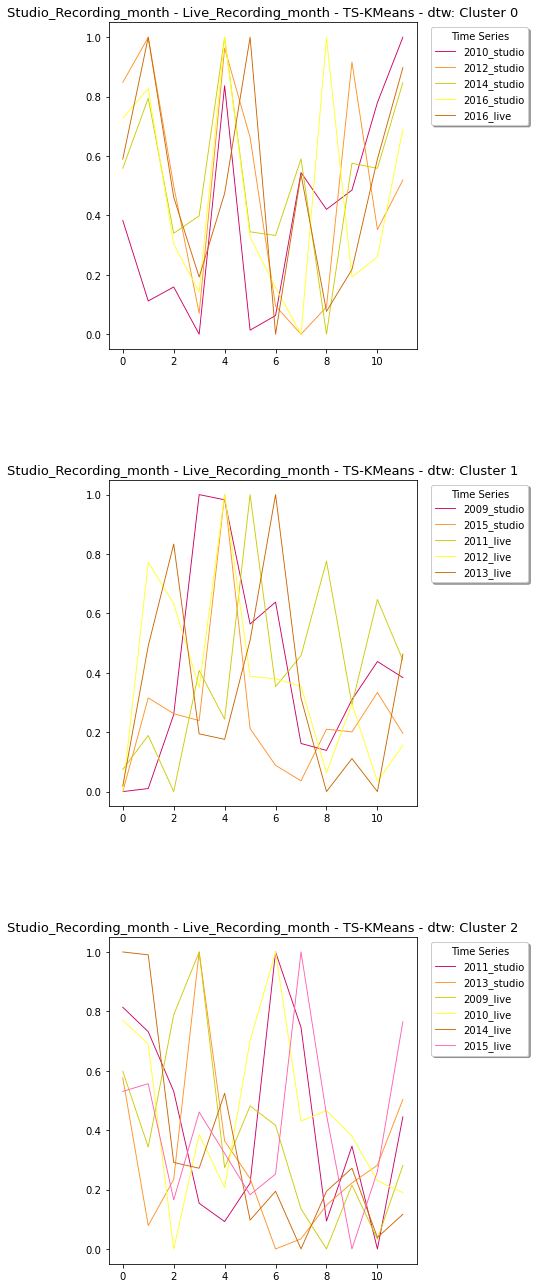

In [202]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 'TS-KMeans - dtw', True)

**Centroids**

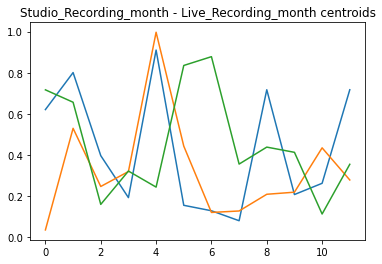

In [203]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  13.823783755751446 Silhouette Score:  0.09484923405683479
Calinski-Harabaz:  2.828529805519422 Davies-Bouldin:  2.195309892837946

k:  3 SSE:  11.297393053049905 Silhouette Score:  0.11963588358245993
Calinski-Harabaz:  3.0604908465614686 Davies-Bouldin:  1.7176350455204012

k:  4 SSE:  9.576248933338475 Silhouette Score:  0.11456363557572116
Calinski-Harabaz:  2.940801696784676 Davies-Bouldin:  1.502295746852293

k:  5 SSE:  7.976807706728526 Silhouette Score:  0.1253643544228274
Calinski-Harabaz:  2.978601905826538 Davies-Bouldin:  1.3281056049479694

k:  6 SSE:  7.026686130576107 Silhouette Score:  0.13205549183835338
Calinski-Harabaz:  2.729601095751421 Davies-Bouldin:  1.143422885769873

k:  7 SSE:  5.720274866664663 Silhouette Score:  0.1324163434646041
Calinski-Harabaz:  2.857319778855082 Davies-Bouldin:  0.9814137072025269

k:  8 SSE:  4.628544306288197 Silhouette Score:  0.1267411482845397
Calinski-Harabaz:  2.960058556333843 Davies-Bouldin:  0.9084134175321321

k:

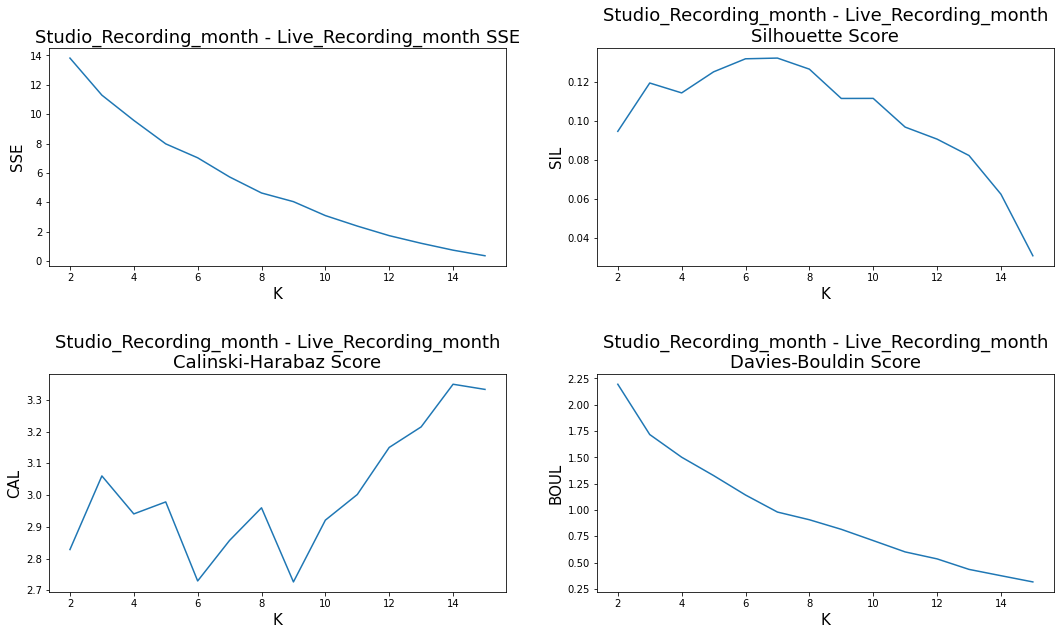

In [204]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [205]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(7, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (7, 12)

Labels:  {0: 2, 1: 3, 2: 2, 3: 3, 4: 1, 5: 1, 6: 4}

SSE:  5.720274866664663
Silhouette Score:  0.1324163434646041
Calinski - Harabaz Score:  2.857319778855082
Davies - Bouldin Score:  0.9814137072025269


In [206]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_2)

Dataset con le labels associate


January  February     March     April       May  \
track_date_created                                                     
2009_studio         0.000000  0.010219  0.259124  1.000000  0.982482   
2010_studio         0.383104  0.111984  0.159136  0.000000  0.836935   
2011_studio         0.813916  0.731392  0.530744  0.153722  0.092233   
2012_studio         0.848080  1.000000  0.499165  0.070117  0.963272   
2013_studio         0.576062  0.078764  0.233977  1.000000  0.363707   
2014_studio         0.558680  0.794621  0.339853  0.398533  1.000000   
2015_studio         0.000000  0.315578  0.262312  0.239196  1.000000   
2016_studio         0.727007  0.827737  0.303650  0.141606  1.000000   
2009_live           0.598540  0.343066  0.788321  1.000000  0.273723   
2010_live           0.770115  0.689655  0.000000  0.385057  0.206897   
2011_live           0.074627  0.189055  0.000000  0.407960  0.243781   
2012_live           0.000000  0.772152  0.632911  0.350211  1.000000   
2013_live           0.018519  0.490741  0.833333  0.194444  0.175926   
2014_live           1.000000  0.990291  0.291262  0.271845  0.524272   
2015_live           0.530435  0.556522  0.165217  0.460870  0.321739   
2016_live           0.589744  1.000000  0.461538  0.192308  0.474359   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.564234  0.637956  0.162044   0.138686  0.309489   
2010_studio         0.013752  0.062868  0.544204   0.420432  0.485265   
2011_studio         0.221683  1.000000  0.745955   0.093851  0.346278   
2012_studio         0.662771  0.095159  0.000000   0.091820  0.916528   
2013_studio         0.237066  0.000000  0.033977   0.147490  0.222394   
2014_studio         0.344743  0.332518  0.590465   0.000000  0.575795   
2015_studio         0.212060  0.088442  0.036181   0.210050  0.201005   
2016_studio         0.327007  0.157664  0.000000   0.998540  0.192701   
2009_live           0.481752  0.416058  0.135036   0.000000  0.215328   
2010_live           0.701149  1.000000  0.431034   0.465517  0.379310   
2011_live           1.000000  0.353234  0.457711   0.776119  0.293532   
2012_live           0.388186  0.379747  0.354430   0.063291  0.295359   
2013_live           0.509259  1.000000  0.314815   0.000000  0.111111   
2014_live           0.097087  0.194175  0.000000   0.194175  0.271845   
2015_live           0.182609  0.252174  1.000000   0.452174  0.000000   
2016_live           1.000000  0.000000  0.538462   0.076923  0.217949   

                    November  December  Labels  
track_date_created                              
2009_studio         0.437956  0.383942       3  
2010_studio         0.779961  1.000000       6  
2011_studio         0.000000  0.444984       1  
2012_studio         0.352254  0.519199       2  
2013_studio         0.281853  0.503475       0  
2014_studio         0.558680  0.847188       6  
2015_studio         0.333668  0.195980       3  
2016_studio         0.259854  0.690511       5  
2009_live           0.032847  0.281022       0  
2010_live           0.229885  0.189655       1  
2011_live           0.646766  0.442786       4  
2012_live           0.033755  0.156118       3  
2013_live           0.000000  0.462963       1  
2014_live           0.038835  0.116505       2  
2015_live           0.260870  0.765217       6  
2016_live           0.589744  0.897436       6

Cluster 0
 ['2013_studio', '2009_live']

Cluster 1
 ['2011_studio', '2010_live', '2013_live']

Cluster 2
 ['2012_studio', '2014_live']

Cluster 3
 ['2009_studio', '2015_studio', '2012_live']

Cluster 4
 ['2011_live']

Cluster 5
 ['2016_studio']

Cluster 6
 ['2010_studio', '2014_studio', '2015_live', '2016_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                1              1            2   1.0000  0.5000
Cluster 1                1              2            3   0.9183  0.6667
Cluster 2                1              1            2   1.0000  0.5000
Cluster 3                2              1            3   0.9183  0.6667
Cluster 4                0              1            1  -0.0000  1.0000
Cluster 5                1              0            1  -0.0000  1.0000
Cluster 6                2              2            4   1.0000  0.5000
Total                    8              8           16   0.8444  0.6250

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [207]:
F = [list(calculate_features(x).values())for x in tss_studio_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  8.85283352569496 Silhouette Score:  0.7538236552828226
Calinski-Harabaz:  38.74697368720963 Davies-Bouldin:  0.12333848826855873

k:  3 SSE:  4.013835276254675 Silhouette Score:  0.4112781549588288
Calinski-Harabaz:  47.51391049135022 Davies-Bouldin:  0.5510123698131194

k:  4 SSE:  1.6540596635306415 Silhouette Score:  0.4788644613427475
Calinski-Harabaz:  76.66044797585016 Davies-Bouldin:  0.4912360471467705

k:  5 SSE:  1.097841490614037 Silhouette Score:  0.3753302130793465
Calinski-Harabaz:  80.79969389809062 Davies-Bouldin:  0.572791313684146

k:  6 SSE:  0.6546585533091138 Silhouette Score:  0.42388051849291397
Calinski-Harabaz:  99.89830466949482 Davies-Bouldin:  0.2755656491088987

k:  7 SSE:  0.37904370689097855 Silhouette Score:  0.3764326922590734
Calinski-Harabaz:  130.49387466437284 Davies-Bouldin:  0.31386792860668244

k:  8 SSE:  0.23787715890965527 Silhouette Score:  0.32442047728674306
Calinski-Harabaz:  159.10455080585385 Davies-Bouldin:  0.31402483238349

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  9 SSE:  0.182717662603177 Silhouette Score:  0.22484731132184013
Calinski-Harabaz:  158.8523665228575 Davies-Bouldin:  0.30706410408188145

k:  10 SSE:  0.1184575761615266 Silhouette Score:  0.2025682921286952
Calinski-Harabaz:  187.0477845914505 Davies-Bouldin:  0.4213846624658375

k:  11 SSE:  0.07827109516942181 Silhouette Score:  0.1928082973234288
Calinski-Harabaz:  212.56906647718606 Davies-Bouldin:  0.28713261877058044

k:  12 SSE:  0.048595816837597686 Silhouette Score:  0.14041912633769715
Calinski-Harabaz:  249.2223682863155 Davies-Bouldin:  0.2150596003153525

k:  13 SSE:  0.02210423822099632 Silhouette Score:  0.12389719999889778
Calinski-Harabaz:  376.9887225734484 Davies-Bouldin:  0.1897083435378018



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert

k:  14 SSE:  0.008674055159646574 Silhouette Score:  0.0963475437289456
Calinski-Harabaz:  591.4299543231688 Davies-Bouldin:  0.10353749779839143

k:  15 SSE:  0.0007715195011671353 Silhouette Score:  0.08051662093751352
Calinski-Harabaz:  3087.925542649819 Davies-Bouldin:  0.0538109931400728



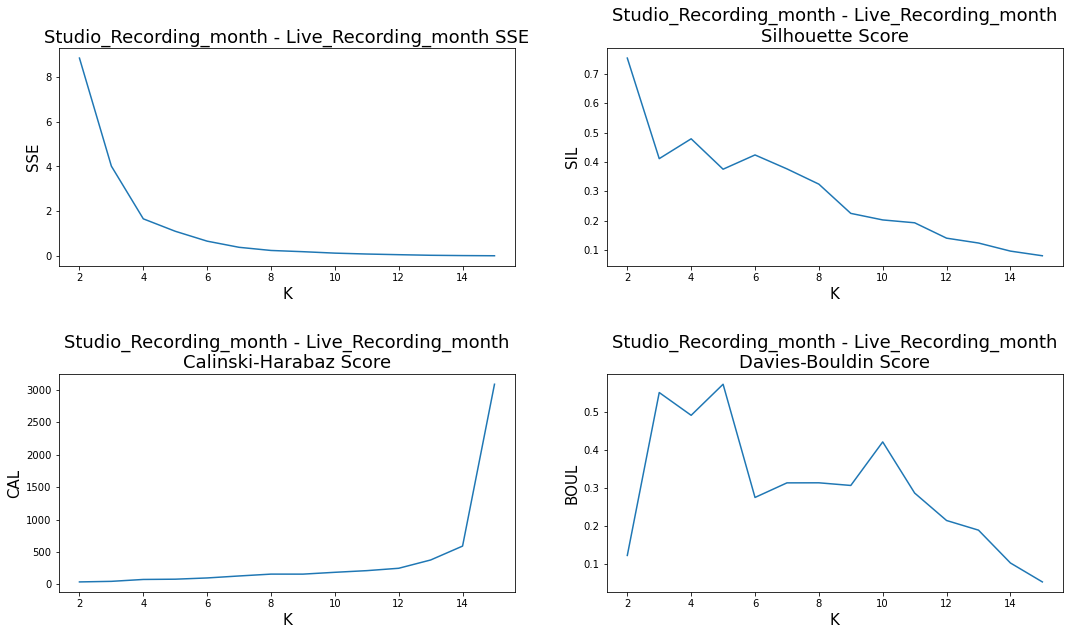

In [208]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [209]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(4, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (4, 5)

Labels:  {0: 5, 1: 1, 2: 2, 3: 8}

SSE:  1.6540596635306415
Silhouette Score:  0.4788644613427475
Calinski - Harabaz Score:  76.66044797585016
Davies - Bouldin Score:  0.4912360471467705


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

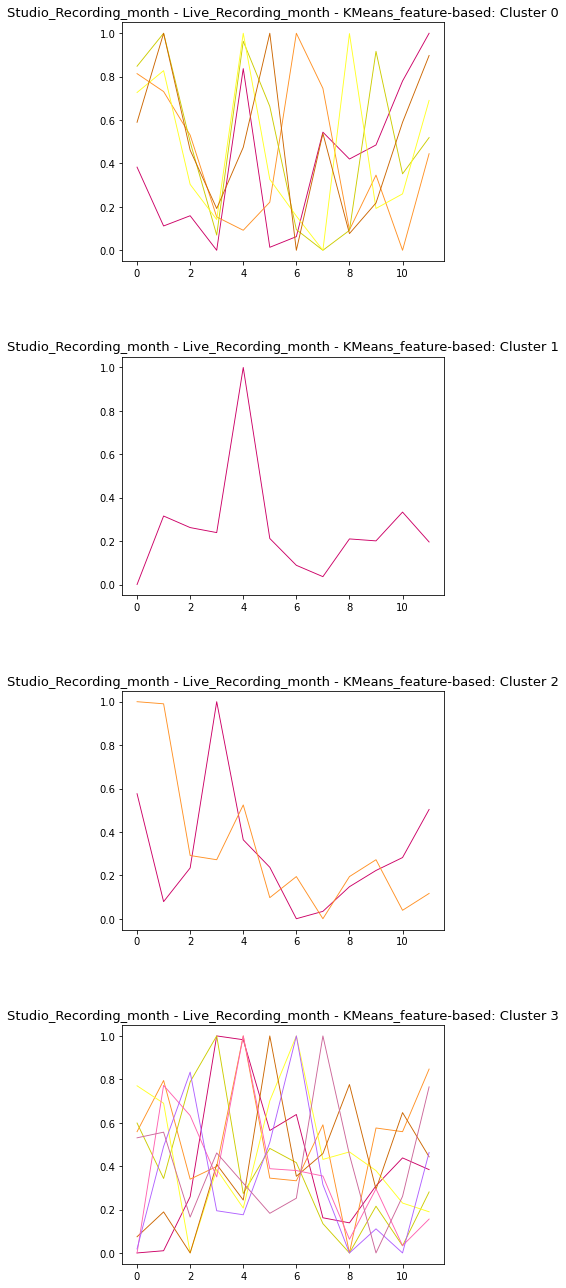

In [210]:
analyze_clusters_fb(labels_studio_live_fb, tss_studio_live_scaled, album_type, 'KMeans_feature-based', True)

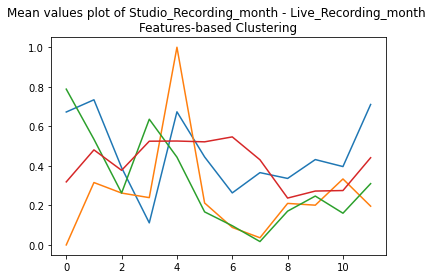

In [211]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [212]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [213]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 12, 1) (16, 16)


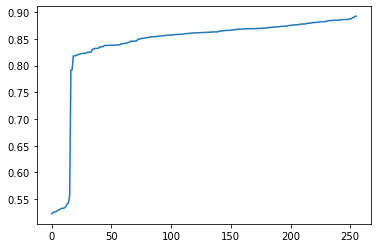

In [214]:
plt.plot(sorted(M.ravel()))
plt.show()

In [215]:
dbscan_compression_studio_live = DBSCAN(eps=0.83, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.83, metric='precomputed')

In [216]:
dbscan_compression_studio_live.labels_

array([-1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [217]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

In [218]:
X_paa.shape

(16, 6, 1)

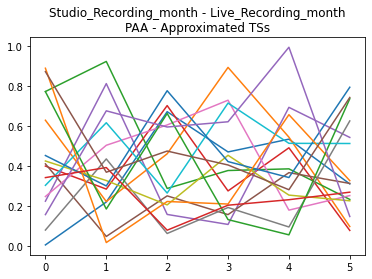

In [219]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + "\nPAA - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  0.22930308944660088 Silhouette Score:  0.19764261987968487

k:  3 SSE:  0.1673524935273431 Silhouette Score:  0.23536168440577376

k:  4 SSE:  0.1276570034085462 Silhouette Score:  0.2575564786759959

k:  5 SSE:  0.10240375146751315 Silhouette Score:  0.27154703567914784

k:  6 SSE:  0.08370557919586219 Silhouette Score:  0.2972677587192773

k:  7 SSE:  0.06222268947447914 Silhouette Score:  0.30156849633670735

k:  8 SSE:  0.04828531594836768 Silhouette Score:  0.2637065903250552

k:  9 SSE:  0.038206128241463605 Silhouette Score:  0.2497307126976578

k:  10 SSE:  0.03069689174368114 Silhouette Score:  0.22523089843995214

k:  11 SSE:  0.02345434771846584 Silhouette Score:  0.21378601618687526

k:  12 SSE:  0.016221274677181898 Silhouette Score:  0.17677762935988894

k:  13 SSE:  0.009853351338802083 Silhouette Score:  0.14381079865274113

k:  14 SSE:  0.004278699710821014 Silhouette Score:  0.13193139571675674

k:  15 SSE:  0.001831525069281483 Silhouette Score:  0.070607

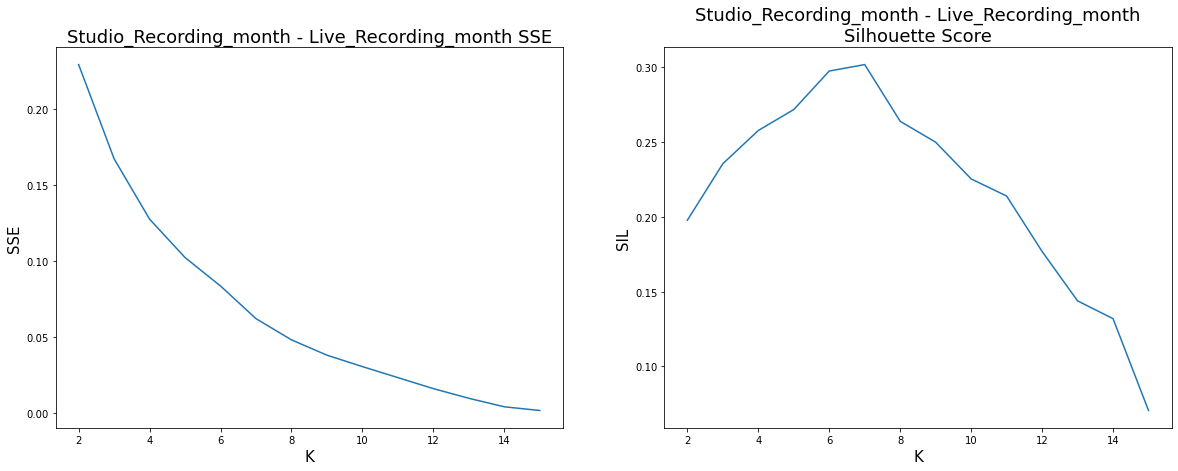

In [220]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [221]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(7, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (7, 6, 1)

Labels:  {0: 2, 1: 2, 2: 3, 3: 2, 4: 2, 5: 4, 6: 1}

SSE:  0.06222268947447914
Silhouette Score:  0.30156849633670735


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.005109  0.629562  0.773358  0.400000  0.224088   
2010_studio         0.247544  0.079568  0.425344  0.303536  0.452849   
2011_studio         0.772654  0.342233  0.156958  0.872977  0.220065   
2012_studio         0.924040  0.284641  0.813022  0.047579  0.504174   
2013_studio         0.327413  0.616988  0.300386  0.016988  0.184942   
2014_studio         0.676650  0.369193  0.672372  0.461491  0.287897   
2015_studio         0.157789  0.250754  0.606030  0.062312  0.205528   
2016_studio         0.777372  0.222628  0.663504  0.078832  0.595620   
2009_live           0.470803  0.894161  0.377737  0.275547  0.107664   
2010_live           0.729885  0.192529  0.454023  0.715517  0.422414   
2011_live           0.131841  0.203980  0.621891  0.405473  0.534826   
2012_live           0.386076  0.491561  0.694093  0.367089  0.179325   
2013_live           0.254630  0.513889  0.342593  0.657407  0.055556   
2014_live           0.995146  0.281553  0.310680  0.097087  0.233010   
2015_live           0.543478  0.313043  0.252174  0.626087  0.226087   
2016_live           0.794872  0.326923  0.737179  0.269231  0.147436   

                           5  Labels  
track_date_created                    
2009_studio         0.410949       5  
2010_studio         0.889980       3  
2011_studio         0.222492       2  
2012_studio         0.435726       4  
2013_studio         0.392664       0  
2014_studio         0.702934       1  
2015_studio         0.264824       5  
2016_studio         0.475182       4  
2009_live           0.156934       0  
2010_live           0.209770       2  
2011_live           0.544776       3  
2012_live           0.094937       5  
2013_live           0.231481       5  
2014_live           0.077670       6  
2015_live           0.513043       2  
2016_live           0.743590       1

Cluster 0
 ['2013_studio', '2009_live']

Cluster 1
 ['2014_studio', '2016_live']

Cluster 2
 ['2011_studio', '2010_live', '2015_live']

Cluster 3
 ['2010_studio', '2011_live']

Cluster 4
 ['2012_studio', '2016_studio']

Cluster 5
 ['2009_studio', '2015_studio', '2012_live', '2013_live']

Cluster 6
 ['2014_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                1              1            2   1.0000  0.5000
Cluster 1                1              1            2   1.0000  0.5000
Cluster 2                1              2            3   0.9183  0.6667
Cluster 3                1              1            2   1.0000  0.5000
Cluster 4                2              0            2  -0.0000  1.0000
Cluster 5                2              2            4   1.0000  0.5000
Cluster 6                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.7972  0.6250

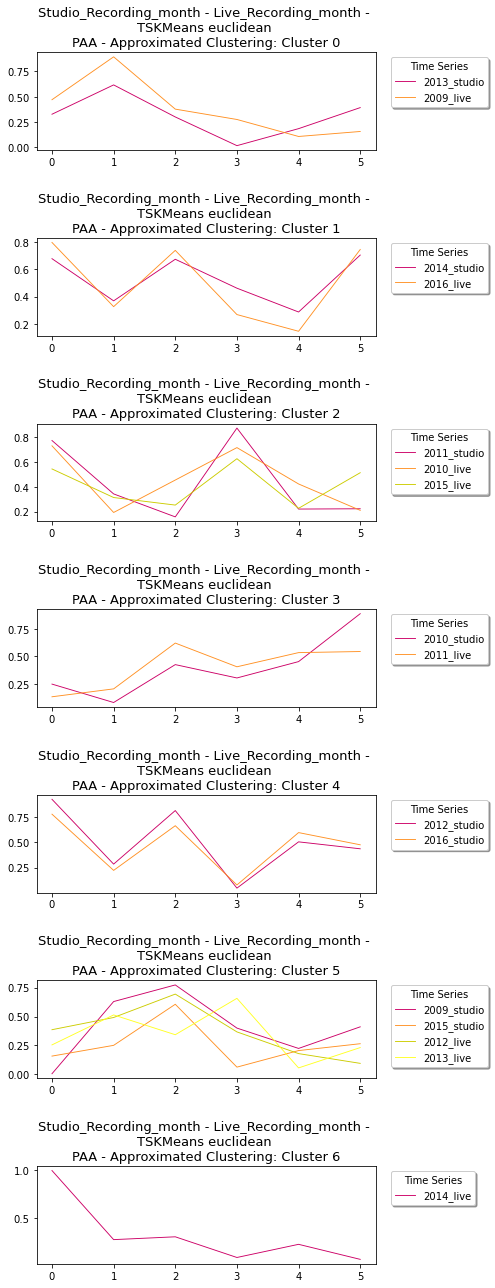

In [222]:
analyze_approximated_clusters(labels_studio_live_paa, X_paa, df_tss_studio_live_scaled, album_type, \
                               '\nTSKMeans euclidean \nPAA - Approximated Clustering', True)

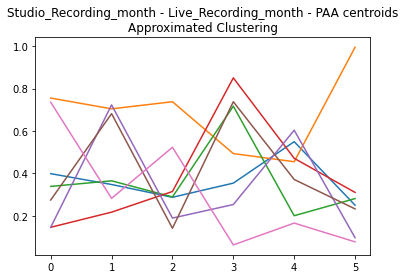

In [223]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type, 'PAA')

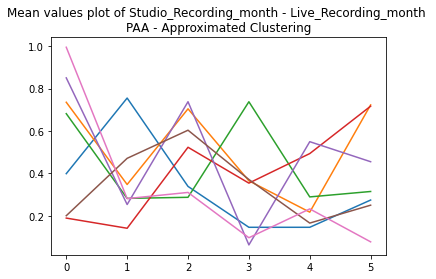

In [224]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.13371801293912147 Silhouette Score:  0.26009627421046233

k:  3 SSE:  0.10568215613402818 Silhouette Score:  0.24292355776211683

k:  4 SSE:  0.08351307963184224 Silhouette Score:  0.2512655283287891

k:  5 SSE:  0.065488286847566 Silhouette Score:  0.22131016188756858

k:  6 SSE:  0.05242372860164821 Silhouette Score:  0.1971167611102833

k:  7 SSE:  0.04104263050158544 Silhouette Score:  0.21246359127032

k:  8 SSE:  0.028189755037526323 Silhouette Score:  0.2333304631705279

k:  9 SSE:  0.023540019093509452 Silhouette Score:  0.18374996447543937

k:  10 SSE:  0.01775986312030394 Silhouette Score:  0.21102384228797325

k:  11 SSE:  0.012566252838288789 Silhouette Score:  0.14597952433643513

k:  12 SSE:  0.008856542585327065 Silhouette Score:  0.1292336564177643

k:  13 SSE:  0.0061942517748752495 Silhouette Score:  0.1133131143837913

k:  14 SSE:  0.003747077133335718 Silhouette Score:  0.08895573812785282

k:  15 SSE:  0.001831525069281483 Silhouette Score:  0.0421580

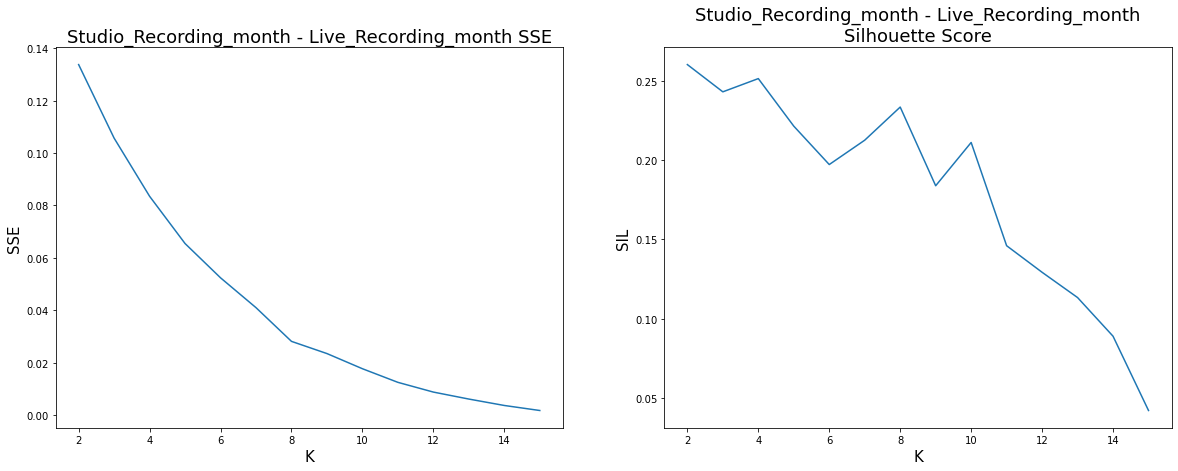

In [225]:
find_optimal_k_kmeans(15, 'dtw', X_paa, False, album_type)

In [226]:
cluster_centers_studio_live_paa_dtw, dict_label_studio_live_paa_dtw, \
labels_studio_live_paa_dtw = run_kmeans(4, 1000, 10, 'dtw', X_paa, False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 5, 1: 7, 2: 1, 3: 3}

SSE:  0.08351307963184224
Silhouette Score:  0.2512655283287891


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.005109  0.629562  0.773358  0.400000  0.224088   
2010_studio         0.247544  0.079568  0.425344  0.303536  0.452849   
2011_studio         0.772654  0.342233  0.156958  0.872977  0.220065   
2012_studio         0.924040  0.284641  0.813022  0.047579  0.504174   
2013_studio         0.327413  0.616988  0.300386  0.016988  0.184942   
2014_studio         0.676650  0.369193  0.672372  0.461491  0.287897   
2015_studio         0.157789  0.250754  0.606030  0.062312  0.205528   
2016_studio         0.777372  0.222628  0.663504  0.078832  0.595620   
2009_live           0.470803  0.894161  0.377737  0.275547  0.107664   
2010_live           0.729885  0.192529  0.454023  0.715517  0.422414   
2011_live           0.131841  0.203980  0.621891  0.405473  0.534826   
2012_live           0.386076  0.491561  0.694093  0.367089  0.179325   
2013_live           0.254630  0.513889  0.342593  0.657407  0.055556   
2014_live           0.995146  0.281553  0.310680  0.097087  0.233010   
2015_live           0.543478  0.313043  0.252174  0.626087  0.226087   
2016_live           0.794872  0.326923  0.737179  0.269231  0.147436   

                           5  Labels  
track_date_created                    
2009_studio         0.410949       3  
2010_studio         0.889980       3  
2011_studio         0.222492       1  
2012_studio         0.435726       1  
2013_studio         0.392664       0  
2014_studio         0.702934       1  
2015_studio         0.264824       0  
2016_studio         0.475182       1  
2009_live           0.156934       0  
2010_live           0.209770       1  
2011_live           0.544776       3  
2012_live           0.094937       0  
2013_live           0.231481       0  
2014_live           0.077670       2  
2015_live           0.513043       1  
2016_live           0.743590       1

Cluster 0
 ['2013_studio', '2015_studio', '2009_live', '2012_live', '2013_live']

Cluster 1
 ['2011_studio', '2012_studio', '2014_studio', '2016_studio', '2010_live', '2015_live', '2016_live']

Cluster 2
 ['2014_live']

Cluster 3
 ['2009_studio', '2010_studio', '2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              3            5   0.9710  0.6000
Cluster 1                4              3            7   0.9852  0.5714
Cluster 2                0              1            1  -0.0000  1.0000
Cluster 3                2              1            3   0.9183  0.6667
Total                    8              8           16   0.9066  0.6250

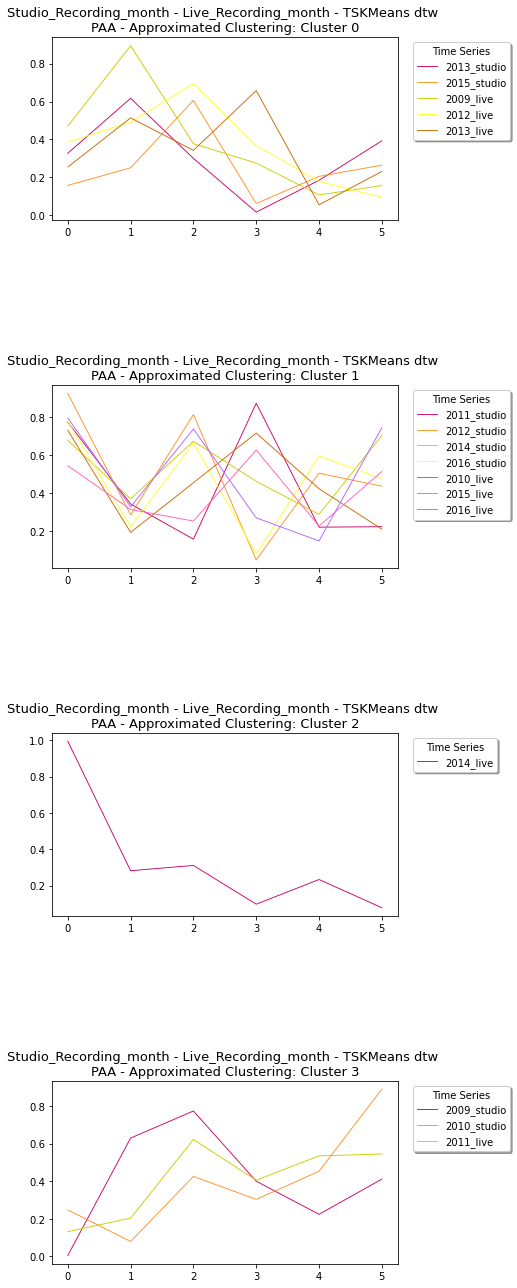

In [227]:
analyze_approximated_clusters(labels_studio_live_paa_dtw, X_paa, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', True)

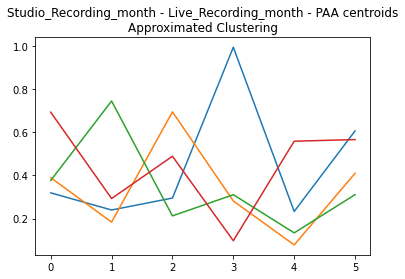

In [228]:
plot_centroids_approximated(cluster_centers_studio_live_paa_dtw, X_paa, album_type, 'PAA')

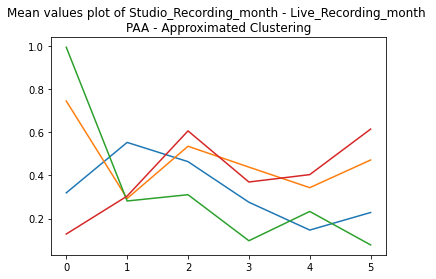

In [229]:
plot_mean_values_approximated(labels_studio_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [230]:
n_sax1d_segments = 6
n_sax_symbols_avg = 6
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_studio_live_scaled)

In [231]:
#plt.plot(X_sax1d.reshape(X_sax1d.shape[1], X_sax1d.shape[0]))
#plt.title(album_type + "\nOneD_Sax - Approximated TSs")
#plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  9.395833333333332 Silhouette Score:  0.13230841989315278

k:  3 SSE:  7.63125 Silhouette Score:  0.11084075419307615

k:  4 SSE:  6.0 Silhouette Score:  0.14995816567814435

k:  5 SSE:  5.095833333333333 Silhouette Score:  0.14128191964842474

k:  6 SSE:  4.1875 Silhouette Score:  0.130009812505255

k:  7 SSE:  3.5781249999999996 Silhouette Score:  0.13085822008626824

k:  8 SSE:  2.947916666666666 Silhouette Score:  0.14035541850414046

k:  9 SSE:  2.3906249999999996 Silhouette Score:  0.13214808950595416

k:  10 SSE:  1.958333333333333 Silhouette Score:  0.11532736035008306

k:  11 SSE:  1.53125 Silhouette Score:  0.0898993536366269

k:  12 SSE:  1.09375 Silhouette Score:  0.0951240565088642

k:  13 SSE:  0.7187499999999999 Silhouette Score:  0.0860738136232666

k:  14 SSE:  0.34375 Silhouette Score:  0.07714618319382757

k:  15 SSE:  0.15625000000000003 Silhouette Score:  0.03807167394576045



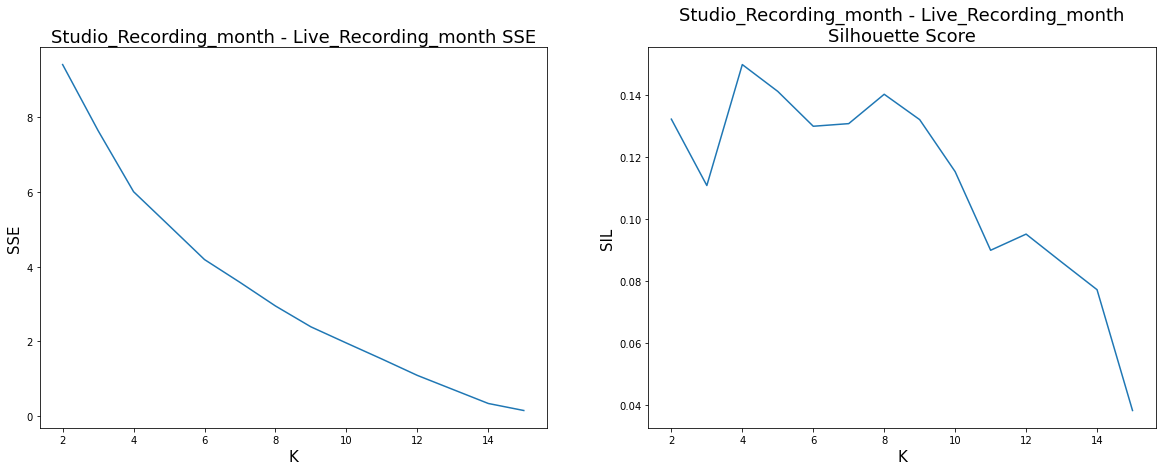

In [232]:
find_optimal_k_kmeans(15, 'euclidean', X_sax1d, False, album_type)

In [233]:
cluster_centers_studio_live_sax1d, dict_label_studio_live_sax1d, \
labels_studio_live_sax1d = run_kmeans(4, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (4, 6, 2)

Labels:  {0: 4, 1: 4, 2: 4, 3: 4}

SSE:  6.0
Silhouette Score:  0.14995816567814435


In [234]:
#analyze_approximated_clusters(labels_studio_live_sax1d, X_sax1d, df_tss_studio_live_scaled, \
#                              album_type, \
#                              '\nTSKMeans - OneD_SAX - Approximated Clustering', True)

In [235]:
#plot_centroids_approximated(cluster_centers_studio_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

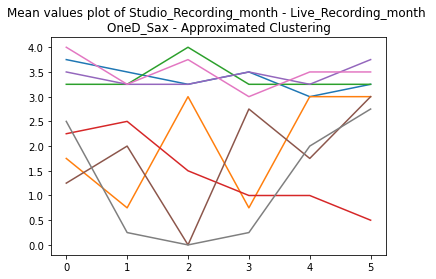

In [236]:
plot_mean_values_approximated(labels_studio_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  4.832871795279884 Silhouette Score:  0.15664497268555666

k:  3 SSE:  3.601860119047619 Silhouette Score:  0.21776206206989887

k:  4 SSE:  2.859126984126984 Silhouette Score:  0.23842063675620573

k:  5 SSE:  2.4049603174603176 Silhouette Score:  0.20564689068874153

k:  6 SSE:  1.8729166666666668 Silhouette Score:  0.2299145594668528

k:  7 SSE:  1.6937499999999999 Silhouette Score:  0.19739047102607243

k:  8 SSE:  1.3197916666666667 Silhouette Score:  0.17857952471204408

k:  9 SSE:  1.0274305555555556 Silhouette Score:  0.17001351009910004

k:  10 SSE:  0.890625 Silhouette Score:  0.1258823577684468

k:  11 SSE:  0.6510416666666666 Silhouette Score:  0.09269897632505655

k:  12 SSE:  0.42187499999999994 Silhouette Score:  0.12926214825849558

k:  13 SSE:  0.22916666666666669 Silhouette Score:  0.09403439966404935

k:  14 SSE:  0.14583333333333331 Silhouette Score:  0.08256543597203224

k:  15 SSE:  0.03125 Silhouette Score:  0.05766560817564839



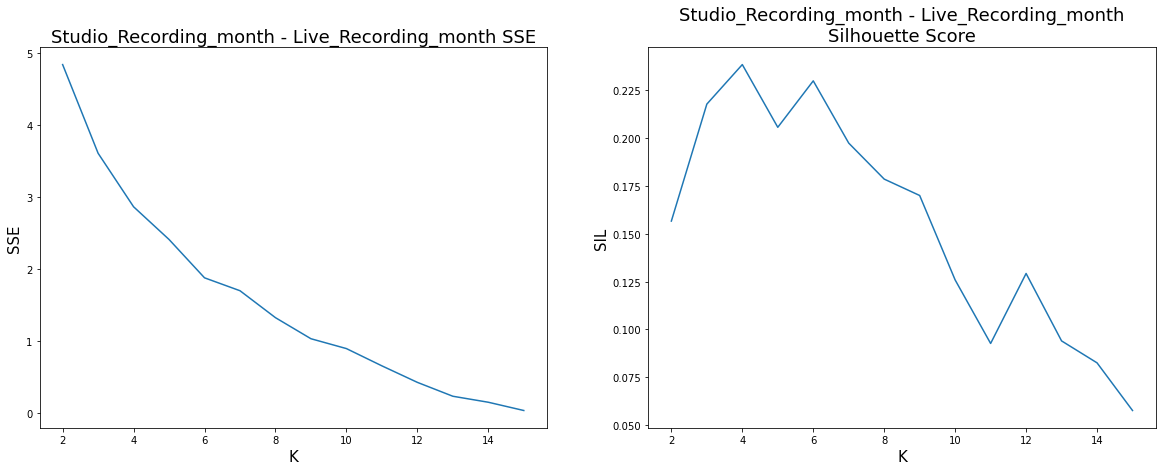

In [237]:
find_optimal_k_kmeans(15, 'dtw', X_sax1d, False, album_type)

In [238]:
cluster_centers_studio_live_sax1d_dtw, dict_label_studio_live_sax1d_dtw, \
labels_studio_live_sax1d_dtw = run_kmeans(4, 1000, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (4, 6, 2)

Labels:  {0: 2, 1: 5, 2: 5, 3: 4}

SSE:  2.859126984126984
Silhouette Score:  0.23842063675620573


In [239]:
#analyze_approximated_clusters(labels_studio_sax1d_dtw, X_sax1d, df_tss_studio_scaled, album_type, \
#                               'TSKMeans dtw \nOneD_SAX - Approximated Clustering', False)

In [240]:
#plot_centroids_approximated(cluster_centers_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

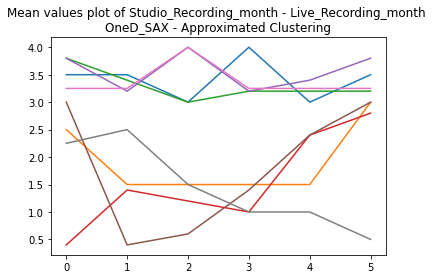

In [241]:
plot_mean_values_approximated(labels_studio_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [242]:
n_sax_segments = 6
n_sax_symbols = 6

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_live_scaled)

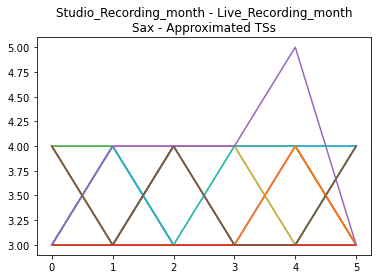

In [243]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  1.0124999999999997 Silhouette Score:  0.25629035132875705

k:  3 SSE:  0.6749999999999999 Silhouette Score:  0.3101412370286989

k:  4 SSE:  0.5572916666666666 Silhouette Score:  0.29548768875967624

k:  5 SSE:  0.42499999999999993 Silhouette Score:  0.30152618004391385

k:  6 SSE:  0.34375 Silhouette Score:  0.2616543090653074

k:  7 SSE:  0.2708333333333333 Silhouette Score:  0.3025095996621956

k:  8 SSE:  0.20833333333333331 Silhouette Score:  0.2701077130282382

k:  9 SSE:  0.17708333333333331 Silhouette Score:  0.2259514805718603

k:  10 SSE:  0.125 Silhouette Score:  0.2973349570550447

k:  11 SSE:  0.10416666666666666 Silhouette Score:  0.2165291308792039

k:  12 SSE:  0.0625 Silhouette Score:  0.26830582617584076

k:  13 SSE:  0.03125 Silhouette Score:  0.26830582617584076

k:  14 SSE:  0.0 Silhouette Score:  0.25

k:  15 SSE:  inf Silhouette Score:  0.25



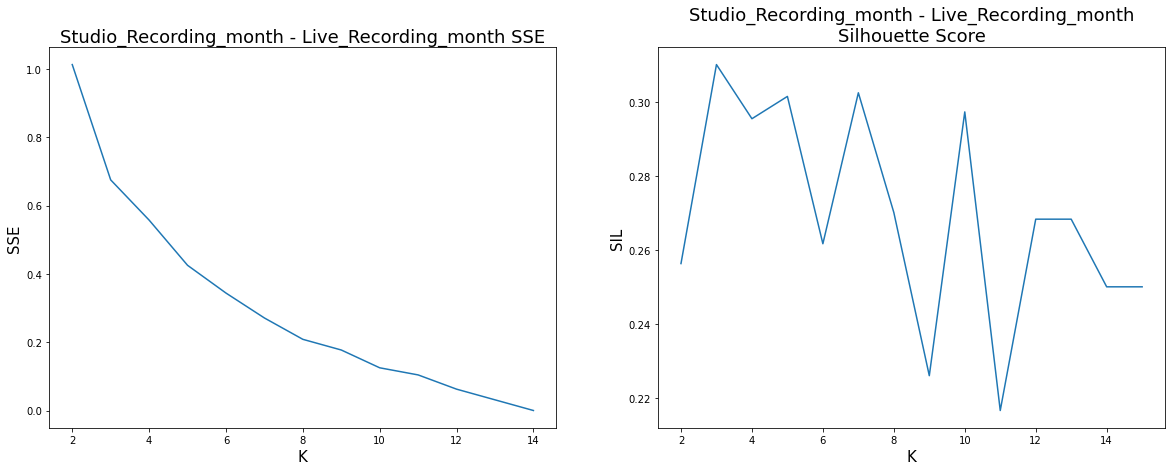

In [244]:
find_optimal_k_kmeans(15, 'euclidean', X_sax, False, album_type)

In [245]:
cluster_centers_studio_live_sax, dict_label_studio_live_sax, \
labels_studio_live_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 5, 1: 6, 2: 5}

SSE:  0.6749999999999999
Silhouette Score:  0.3101412370286989


Dataset con le labels associate


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         3  4  4  3  3  3       1
2010_studio         3  3  3  3  4  4       0
2011_studio         4  3  3  4  3  3       2
2012_studio         4  3  4  3  4  4       0
2013_studio         3  4  3  3  3  3       1
2014_studio         4  3  4  4  3  4       2
2015_studio         3  3  4  3  3  3       1
2016_studio         4  3  4  3  4  4       0
2009_live           4  4  3  3  3  3       1
2010_live           4  3  4  4  3  3       2
2011_live           3  3  4  3  4  4       0
2012_live           3  4  4  3  3  3       1
2013_live           3  4  3  4  3  3       1
2014_live           5  3  3  3  3  3       2
2015_live           4  3  3  4  3  4       2
2016_live           4  3  4  3  3  4       0

Cluster 0
 ['2010_studio', '2012_studio', '2016_studio', '2011_live', '2016_live']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio', '2009_live', '2012_live', '2013_live']

Cluster 2
 ['2011_studio', '2014_studio', '2010_live', '2014_live', '2015_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                3              2            5  0.9710  0.6000
Cluster 1                3              3            6  1.0000  0.5000
Cluster 2                2              3            5  0.9710  0.6000
Total                    8              8           16  0.9818  0.5625

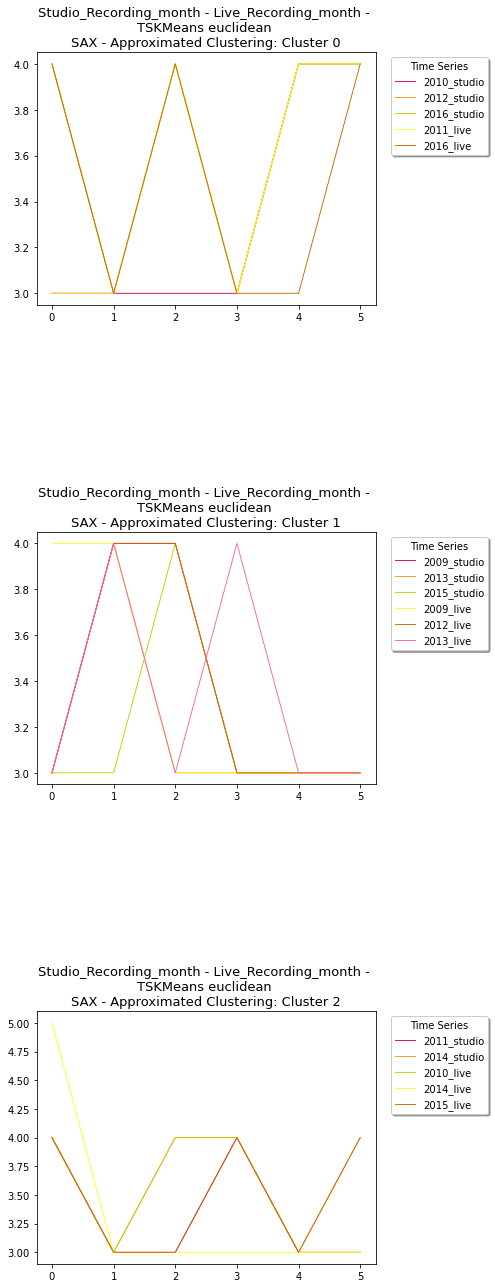

In [246]:
analyze_approximated_clusters(labels_studio_live_sax, X_sax, df_tss_studio_live_scaled, \
                              album_type, \
                              '\nTSKMeans euclidean \nSAX - Approximated Clustering', True)

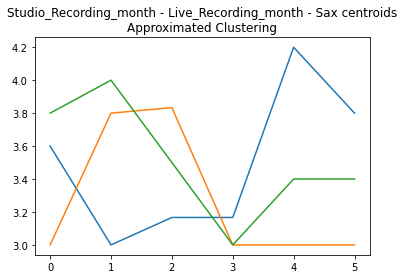

In [247]:
plot_centroids_approximated(cluster_centers_studio_live_sax, X_sax, album_type, 'Sax')

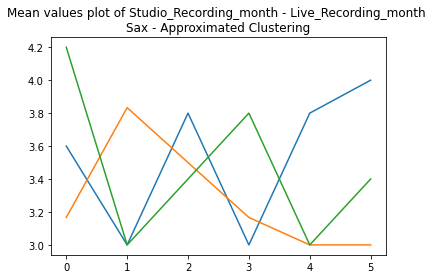

In [248]:
plot_mean_values_approximated(labels_studio_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  0.5322307900432901 Silhouette Score:  0.4588968260435597

k:  3 SSE:  0.32254464285714285 Silhouette Score:  0.4946395678439968

k:  4 SSE:  0.2270833333333333 Silhouette Score:  0.5247775701025889

k:  5 SSE:  0.12499999999999999 Silhouette Score:  0.5810109223634229

k:  6 SSE:  0.08333333333333331 Silhouette Score:  0.6433058261758408

k:  7 SSE:  0.03125 Silhouette Score:  0.7058058261758408

k:  8 SSE:  0.0 Silhouette Score:  0.6875

k:  9 SSE:  inf Silhouette Score:  0.6875

k:  10 SSE:  inf Silhouette Score:  0.6875

k:  11 SSE:  inf Silhouette Score:  0.6875

k:  12 SSE:  inf Silhouette Score:  0.6875

k:  13 SSE:  inf Silhouette Score:  0.6875

k:  14 SSE:  inf Silhouette Score:  0.6875

k:  15 SSE:  inf Silhouette Score:  0.6875



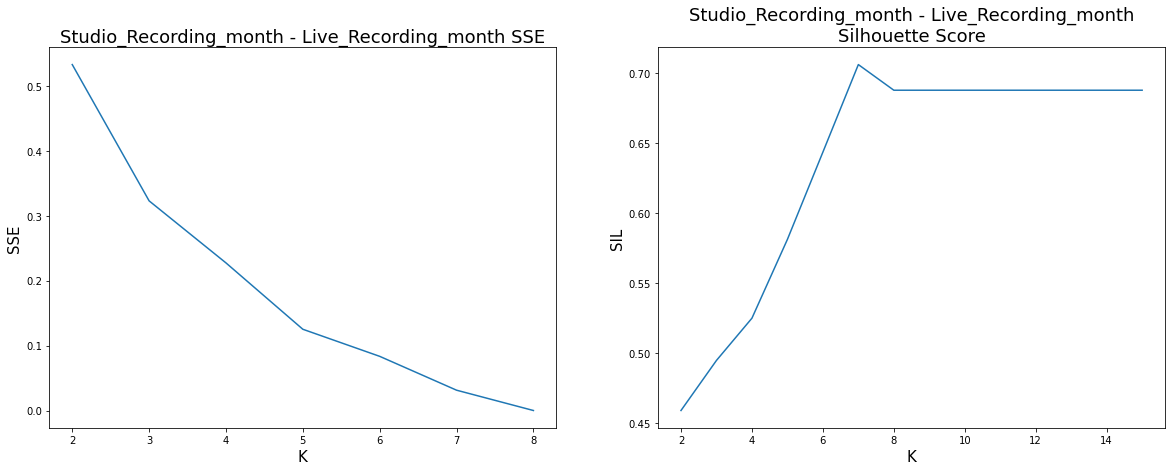

In [249]:
find_optimal_k_kmeans(15, 'dtw', X_sax, False, album_type)

In [250]:
cluster_centers_studio_live_sax_dtw, dict_label_studio_live_sax_dtw, \
labels_studio_live_sax_dtw = run_kmeans(7, 1000, 10, 'dtw', X_sax, False)

cluster_centers_shape (7, 6, 1)

Labels:  {0: 1, 1: 2, 2: 5, 3: 4, 4: 1, 5: 2, 6: 1}

SSE:  0.03125
Silhouette Score:  0.7058058261758408


Dataset con le labels associate


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         3  4  4  3  3  3       3
2010_studio         3  3  3  3  4  4       1
2011_studio         4  3  3  4  3  3       5
2012_studio         4  3  4  3  4  4       2
2013_studio         3  4  3  3  3  3       3
2014_studio         4  3  4  4  3  4       2
2015_studio         3  3  4  3  3  3       3
2016_studio         4  3  4  3  4  4       2
2009_live           4  4  3  3  3  3       6
2010_live           4  3  4  4  3  3       5
2011_live           3  3  4  3  4  4       1
2012_live           3  4  4  3  3  3       3
2013_live           3  4  3  4  3  3       0
2014_live           5  3  3  3  3  3       4
2015_live           4  3  3  4  3  4       2
2016_live           4  3  4  3  3  4       2

Cluster 0
 ['2013_live']

Cluster 1
 ['2010_studio', '2011_live']

Cluster 2
 ['2012_studio', '2014_studio', '2016_studio', '2015_live', '2016_live']

Cluster 3
 ['2009_studio', '2013_studio', '2015_studio', '2012_live']

Cluster 4
 ['2014_live']

Cluster 5
 ['2011_studio', '2010_live']

Cluster 6
 ['2009_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                0              1            1  -0.0000  1.0000
Cluster 1                1              1            2   1.0000  0.5000
Cluster 2                3              2            5   0.9710  0.6000
Cluster 3                3              1            4   0.8113  0.7500
Cluster 4                0              1            1  -0.0000  1.0000
Cluster 5                1              1            2   1.0000  0.5000
Cluster 6                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.7562  0.6875

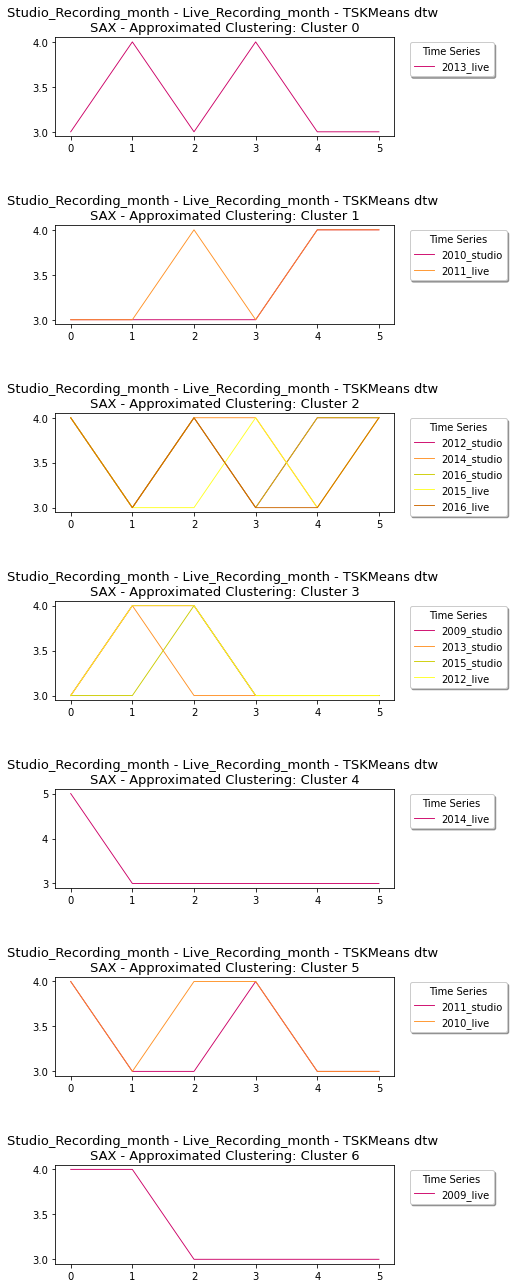

In [251]:
analyze_approximated_clusters(labels_studio_live_sax_dtw, X_sax, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', True)

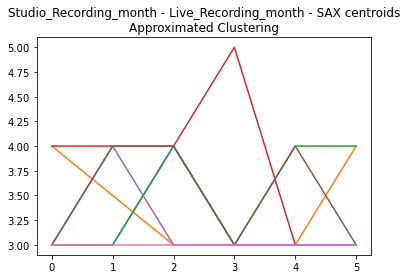

In [252]:
plot_centroids_approximated(cluster_centers_studio_live_sax_dtw, X_sax, album_type, 'SAX')

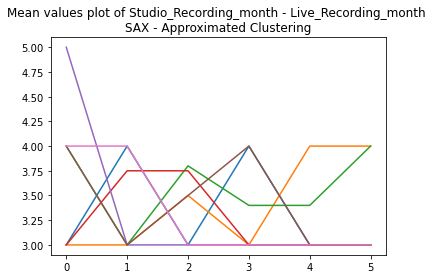

In [253]:
plot_mean_values_approximated(labels_studio_live_sax_dtw, X_sax, album_type, 'SAX')